#   Predicting the impact of an oil discovery on the future GDP of a country: Example of Guyana

##  I) Introduction

The impact of oil discoveries can be significant on the economy of a country. During the industrialization of the 20th century several major oil discoveries have shaped the economies of entire regions, and tremendous amount of economic growth was generated as result, changing the livelihood of millions of people around the world. The most well know oil regions are in the Middle East, Russia, Central Asia, North Africa and Latin America. The economies of oil exporting countries and their GDP have become heavily dependent on the export of its precious crude and its derivatives since the second half of the 20th centuries.

## II) Problematic

In 2015 Guyana, a small country in northern part of South America, made a significant oil discovery that is estimated to about 8 billion barrels. The country's population is less than a million and the main economy was based on agriculture, fishing and mining. The oil discovery made by Exxon Mobil and its partners in the Stabroek block offshore is poised to change the economy and the GDP of the country. A CNBC article dated from Nov 9th 2019 mentions that the  IMF estimates that Guyana will see an 86% of annual economic growth in 2020 as a result of production. Although that number is quoted to be ambitious given the current political and financial contexts. On the other hand, IHS Markit predicts a more reasonable 30% GDP growth for 2020. So how can one quantify the impact of this discovery on the country's GDP over the next few years? And which of the two estimates would be more likely?

## III) Dataset

### 1) Economic Indicators from the World Bank database

#### a) Fuel Exports (%)

Fuel exports tables will help select countries whose economy and GDP rely primarily (>75%) on income from exporting oil and its derivatives.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
! pip install seaborn
import seaborn as sns

In [5]:
pip install world_bank_data --upgrade

Requirement already up-to-date: world_bank_data in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.1.3)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import world_bank_data as wb
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_rows', 20)

In [7]:
wb.search_indicators('fuel exports')

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
TX.VAL.FUEL.ZS.UN,Fuel exports (% of merchandise exports),,World Development Indicators,Fuels comprise the commodities in SITC section...,World Bank staff estimates through the WITS pl...,"Energy & Mining ,Private Sector,Trade"


In [8]:
df2 = wb.get_series('TX.VAL.FUEL.ZS.UN', mrv=100).reset_index()
df2.head()

,Country,Series,Year,TX.VAL.FUEL.ZS.UN
0,Arab World,Fuel exports (% of merchandise exports),1962,NaN
1,Arab World,Fuel exports (% of merchandise exports),1963,NaN
2,Arab World,Fuel exports (% of merchandise exports),1964,NaN
3,Arab World,Fuel exports (% of merchandise exports),1965,NaN
4,Arab World,Fuel exports (% of merchandise exports),1966,NaN


In [9]:
missing_data1 = df2.isnull()
missing_data1.head(5)

,Country,Series,Year,TX.VAL.FUEL.ZS.UN
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [10]:
df2= df2 [['Country','Year','TX.VAL.FUEL.ZS.UN']]
df2

,Country,Year,TX.VAL.FUEL.ZS.UN
0,Arab World,1962,NaN
1,Arab World,1963,NaN
2,Arab World,1964,NaN
3,Arab World,1965,NaN
4,Arab World,1966,NaN
...,...,...,...
15043,Zimbabwe,2014,0.555653
15044,Zimbabwe,2015,2.003545
15045,Zimbabwe,2016,0.372329
15046,Zimbabwe,2017,0.974592


In [11]:
df2= df2.rename(columns={"TX.VAL.FUEL.ZS.UN":'Fuel Exports Pctge'})
df2

,Country,Year,Fuel Exports Pctge
0,Arab World,1962,NaN
1,Arab World,1963,NaN
2,Arab World,1964,NaN
3,Arab World,1965,NaN
4,Arab World,1966,NaN
...,...,...,...
15043,Zimbabwe,2014,0.555653
15044,Zimbabwe,2015,2.003545
15045,Zimbabwe,2016,0.372329
15046,Zimbabwe,2017,0.974592


In [12]:
Oil_Countries_exports = df2[(df2['Fuel Exports Pctge'] >= 75) & (df2['Fuel Exports Pctge'] <= 100)]
Oil_Countries_exports

,Country,Year,Fuel Exports Pctge
12,Arab World,1974,80.301172
13,Arab World,1975,82.202939
14,Arab World,1976,81.841300
16,Arab World,1978,88.028712
17,Arab World,1979,86.794418
...,...,...,...
14924,"Yemen, Rep.",2009,92.206120
14925,"Yemen, Rep.",2010,91.204937
14926,"Yemen, Rep.",2011,89.071371
14927,"Yemen, Rep.",2012,89.483068


In [13]:
Oil_Countries = Oil_Countries_exports.pivot(index='Country', columns='Year', values='Fuel Exports Pctge')
Oil_Countries

Year,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.701545,97.345998,97.196901,97.135491,96.722000,95.764232,94.325860,93.992128,94.516741,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.611775,96.534547,96.556768,97.177924,96.679568,96.194403,93.808362,92.367016,94.322227,95.827420
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.558542,81.924251,81.763295,NaN,75.682242,NaN,NaN,NaN,NaN,NaN
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.856863,94.509496,94.747394,93.419357,92.985039,92.638413,88.285406,91.540575,91.119273,92.222454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkmenistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Venezuela, RB",92.362928,92.91119,91.099545,92.518557,93.401158,93.421344,93.461653,92.359253,91.015971,91.523845,...,95.898373,93.418898,NaN,98.763730,97.667861,NaN,NaN,NaN,NaN,NaN


In [14]:
Oil_Countries_Fuel = Oil_Countries.transpose() 
Oil_Countries_Fuel.head()

Country,Algeria,Angola,Antigua and Barbuda,Arab World,Azerbaijan,"Bahamas, The",Bahrain,Brunei Darussalam,Caribbean small states,"Congo, Rep.",...,Seychelles,Small states,Sudan,Syrian Arab Republic,Trinidad and Tobago,Turkmenistan,United Arab Emirates,"Venezuela, RB",Virgin Islands (U.S.),"Yemen, Rep."
Year,,,,,,,,,,,,,,,,,,,,,
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.196278,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.362928,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.649240,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.911190,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.722020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.099545,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.015827,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.518557,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.209865,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.401158,NaN,NaN


In [15]:
Oil_Countries_Fuel.columns

Index(['Algeria', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Brunei Darussalam',
       'Caribbean small states', 'Congo, Rep.',
       'Fragile and conflict affected situations', 'Gabon', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Kazakhstan', 'Kuwait', 'Lao PDR',
       'Libya', 'Mexico', 'Middle East & North Africa',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle East & North Africa (excluding high income)', 'Nigeria', 'Oman',
       'Other small states', 'Pre-demographic dividend', 'Qatar',
       'Saudi Arabia', 'Seychelles', 'Small states', 'Sudan',
       'Syrian Arab Republic', 'Trinidad and Tobago', 'Turkmenistan',
       'United Arab Emirates', 'Venezuela, RB', 'Virgin Islands (U.S.)',
       'Yemen, Rep.'],
      dtype='object', name='Country')

In [16]:
Oil_Countries_Fuel.drop(['Arab World', 'Fragile and conflict affected situations', 'Caribbean small states', 'Other small states','Small states',
                'Middle East & North Africa', 'Middle East & North Africa (IDA & IBRD countries)','Middle East & North Africa (excluding high income)','Pre-demographic dividend'], axis=1, inplace=True)

In [17]:
Oil_Countries_Fuel.columns

Index(['Algeria', 'Angola', 'Antigua and Barbuda', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Brunei Darussalam', 'Congo, Rep.', 'Gabon',
       'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Lao PDR', 'Libya', 'Mexico', 'Nigeria', 'Oman', 'Qatar',
       'Saudi Arabia', 'Seychelles', 'Sudan', 'Syrian Arab Republic',
       'Trinidad and Tobago', 'Turkmenistan', 'United Arab Emirates',
       'Venezuela, RB', 'Virgin Islands (U.S.)', 'Yemen, Rep.'],
      dtype='object', name='Country')

In [18]:
Oil_Countries_Fuel.shape

(57, 30)

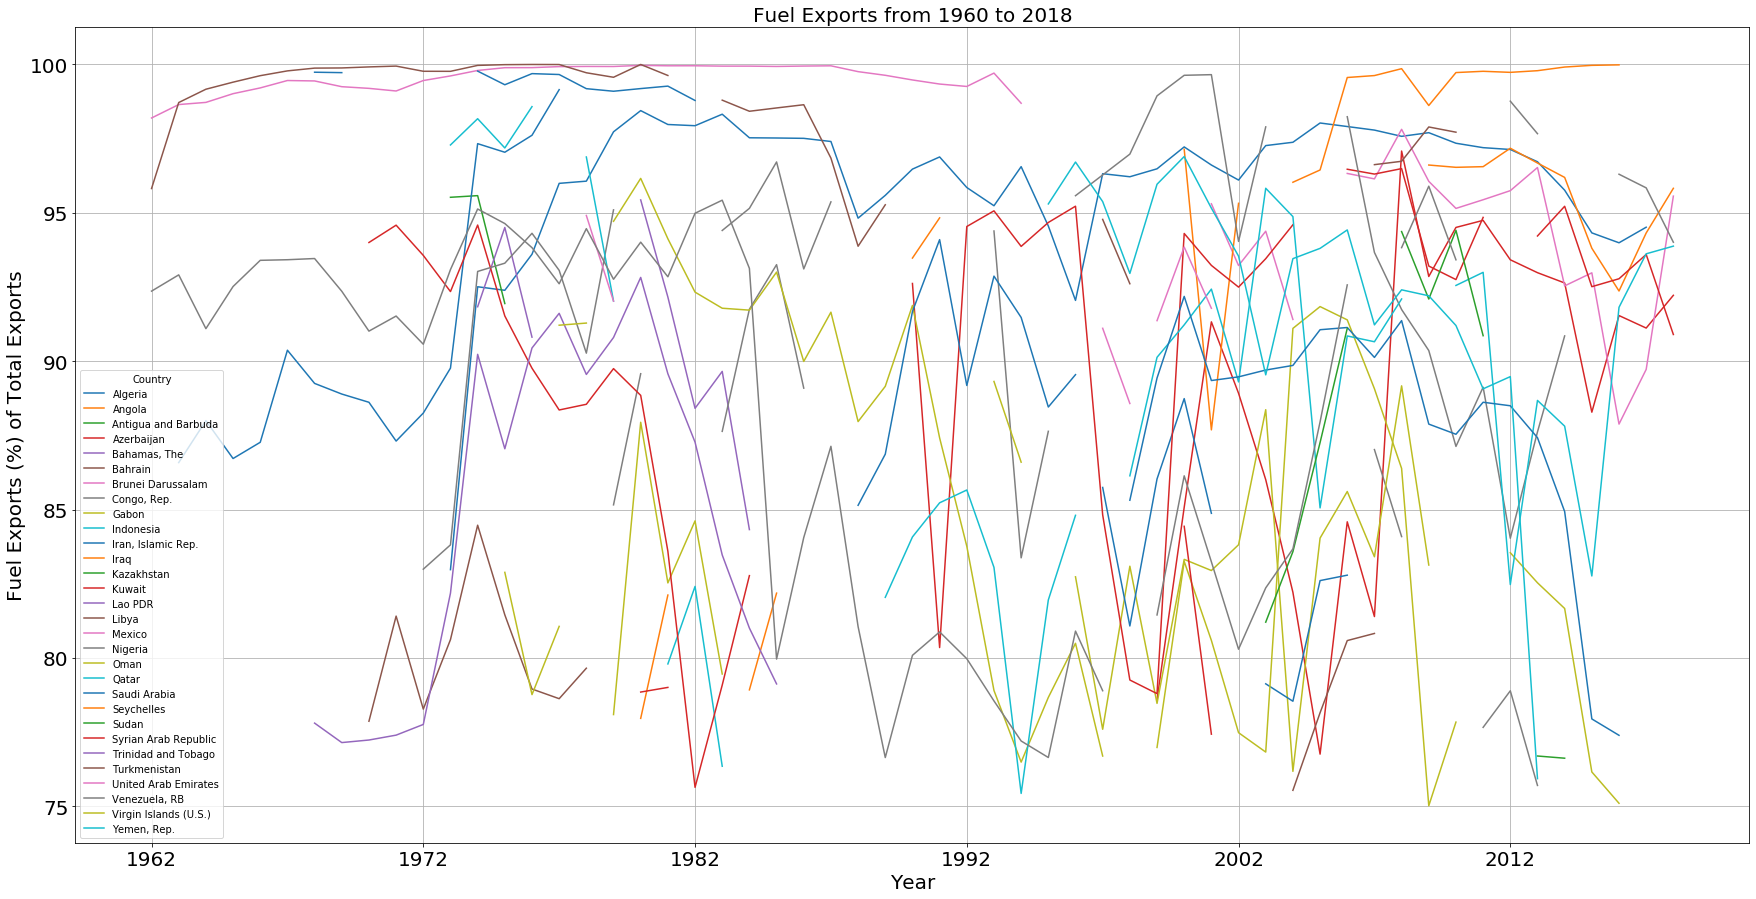

In [72]:
Example = Oil_Countries_Fuel [['Algeria', 'Angola', 'Antigua and Barbuda', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Brunei Darussalam', 'Congo, Rep.', 'Gabon',
       'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Lao PDR', 'Libya', 'Mexico', 'Nigeria', 'Oman', 'Qatar',
       'Saudi Arabia', 'Seychelles', 'Sudan',
       'Syrian Arab Republic', 'Trinidad and Tobago', 'Turkmenistan',
       'United Arab Emirates', 'Venezuela, RB', 'Virgin Islands (U.S.)',
       'Yemen, Rep.']]
Example.plot(figsize=(30, 15),fontsize=20)
plt.title('Fuel Exports from 1960 to 2018', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Fuel Exports (%) of Total Exports', fontsize=20)
plt.grid(True)

In the last few steps I was able to select the countries where fuel exports represent more than three quarters of their total exports. The data is sparse at times for certain countries but overall this is a good representation of these countries dependence to oil as a source of income. The total number of countries is 30.

 
#### b) GDP

The next dataset from the World Bank is GDP in USD from 1960 to 2018. We will focus on the 30 countries determined above. 

In [21]:
wb.search_indicators('gdp')

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
5.51.01.10.gdp,Per capita GDP growth,,Statistical Capacity Indicators,GDP per capita is the sum of gross value added...,World Development Indicator (WDI) databank. Or...,
6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,World Development Indicators (World Bank),Economy & Growth
6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,World Development Indicators (World Bank),Economy & Growth
6.0.GDP_usd,GDP (constant 2005 $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,World Development Indicators (World Bank),Economy & Growth
6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,World Development Indicators (World Bank),Economy & Growth
...,...,...,...,...,...,...
UIS.XUNIT.GDPCAP.23.FSGOV,Initial government funding per secondary stude...,,Education Statistics,"Total general (local, regional and central, cu...",UNESCO Institute for Statistics,
UIS.XUNIT.GDPCAP.23.FSHH,Initial household funding per secondary studen...,,Education Statistics,"Total payments of households (pupils, students...",UNESCO Institute for Statistics,
UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,,Education Statistics,"Total general (local, regional and central, cu...",UNESCO Institute for Statistics,


In [23]:
df3 = wb.get_series('NY.GDP.MKTP.CD', mrv =100).reset_index()
df3.head()

,Country,Series,Year,NY.GDP.MKTP.CD
0,Arab World,GDP (current US$),1960,NaN
1,Arab World,GDP (current US$),1961,NaN
2,Arab World,GDP (current US$),1962,NaN
3,Arab World,GDP (current US$),1963,NaN
4,Arab World,GDP (current US$),1964,NaN


In [24]:
df3= df3 [['Country','Year','NY.GDP.MKTP.CD']]
df3

,Country,Year,NY.GDP.MKTP.CD
0,Arab World,1960,NaN
1,Arab World,1961,NaN
2,Arab World,1962,NaN
3,Arab World,1963,NaN
4,Arab World,1964,NaN
...,...,...,...
15571,Zimbabwe,2014,1.949552e+10
15572,Zimbabwe,2015,1.996312e+10
15573,Zimbabwe,2016,2.054868e+10
15574,Zimbabwe,2017,2.281301e+10


In [25]:
df3= df3.rename(columns={"NY.GDP.MKTP.CD":'GDP USD'})
df3

,Country,Year,GDP USD
0,Arab World,1960,NaN
1,Arab World,1961,NaN
2,Arab World,1962,NaN
3,Arab World,1963,NaN
4,Arab World,1964,NaN
...,...,...,...
15571,Zimbabwe,2014,1.949552e+10
15572,Zimbabwe,2015,1.996312e+10
15573,Zimbabwe,2016,2.054868e+10
15574,Zimbabwe,2017,2.281301e+10


In [26]:
Oil_Countries_GDP = df3.pivot(index='Country', columns='Year', values='GDP USD')
Oil_Countries_GDP

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,1.243909e+10,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204422e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.510250e+10
Algeria,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,3.852116e+09,4.257219e+09,...,1.372148e+11,1.612051e+11,2.000154e+11,2.090629e+11,2.097548e+11,2.138088e+11,1.659784e+11,1.600329e+11,1.673903e+11,1.737580e+11
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.420000e+08,6.610000e+08,6.520000e+08,6.020000e+08,6.360000e+08
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.268200e+09,8.913100e+09,1.046540e+10,1.127940e+10,1.247600e+10,1.271560e+10,1.267300e+10,1.342570e+10,1.449810e+10,1.461590e+10
World,1.370412e+12,1.425639e+12,1.529897e+12,1.648115e+12,1.805479e+12,1.966104e+12,2.133108e+12,2.270744e+12,2.451352e+12,2.704445e+12,...,6.033430e+13,6.604925e+13,7.339148e+13,7.508269e+13,7.723618e+13,7.933444e+13,7.505179e+13,7.616645e+13,8.096319e+13,8.593075e+13
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041523e+10,4.322859e+10,4.262833e+10,3.096824e+10,2.681870e+10,2.691440e+10


In [27]:
Oil_Countries_GDP = Oil_Countries_GDP.transpose() 
Oil_Countries_GDP.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,5.377778e+08,NaN,2.723649e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.779091e+09,NaN,NaN,NaN,1.370412e+12,NaN,7.130000e+08,1.052990e+09
1961,5.488889e+08,NaN,2.434777e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.189091e+09,NaN,NaN,NaN,1.425639e+12,NaN,6.962857e+08,1.096647e+09
1962,5.466667e+08,NaN,2.001469e+09,NaN,NaN,NaN,NaN,NaN,2.445060e+10,NaN,...,NaN,NaN,8.946970e+09,NaN,NaN,NaN,1.529897e+12,NaN,6.931429e+08,1.117602e+09
1963,7.511112e+08,NaN,2.703015e+09,NaN,NaN,NaN,NaN,NaN,1.827212e+10,NaN,...,NaN,NaN,9.753333e+09,NaN,NaN,NaN,1.648115e+12,NaN,7.187143e+08,1.159512e+09
1964,8.000000e+08,NaN,2.909352e+09,NaN,NaN,NaN,NaN,NaN,2.560525e+10,NaN,...,NaN,NaN,8.099318e+09,NaN,NaN,NaN,1.805479e+12,NaN,8.394286e+08,1.217138e+09


In [28]:
Oil_Countries_GDP= Oil_Countries_GDP[['Algeria', 'Angola', 'Antigua and Barbuda', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Brunei Darussalam',
       'Congo, Rep.', 'Gabon', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Kazakhstan', 'Kuwait', 'Lao PDR',
       'Libya', 'Mexico', 'Nigeria', 'Oman', 'Qatar',
       'Saudi Arabia', 'Seychelles', 'Sudan',
       'Syrian Arab Republic', 'Trinidad and Tobago', 'Turkmenistan',
       'United Arab Emirates', 'Venezuela, RB', 'Virgin Islands (U.S.)',
       'Yemen, Rep.']]


In [29]:
Oil_Countries_GDP.head()

Country,Algeria,Angola,Antigua and Barbuda,Azerbaijan,"Bahamas, The",Bahrain,Brunei Darussalam,"Congo, Rep.",Gabon,Indonesia,...,Saudi Arabia,Seychelles,Sudan,Syrian Arab Republic,Trinidad and Tobago,Turkmenistan,United Arab Emirates,"Venezuela, RB",Virgin Islands (U.S.),"Yemen, Rep."
Year,,,,,,,,,,,,,,,,,,,,,
1960,2.723649e+09,NaN,NaN,NaN,1.698039e+08,NaN,NaN,1.317319e+08,1.414690e+08,NaN,...,NaN,1.201203e+07,1.307333e+09,8.577044e+08,5.356701e+08,NaN,NaN,7.779091e+09,NaN,NaN
1961,2.434777e+09,NaN,NaN,NaN,1.900980e+08,NaN,NaN,1.516757e+08,1.676379e+08,NaN,...,NaN,1.159202e+07,1.419333e+09,9.452450e+08,5.849612e+08,NaN,NaN,8.189091e+09,NaN,NaN
1962,2.001469e+09,NaN,NaN,NaN,2.122549e+08,NaN,NaN,1.665212e+08,1.827965e+08,NaN,...,NaN,1.264203e+07,1.541667e+09,1.110566e+09,6.193192e+08,NaN,NaN,8.946970e+09,NaN,NaN
1963,2.703015e+09,NaN,NaN,NaN,2.377451e+08,NaN,NaN,1.722334e+08,1.544802e+08,NaN,...,NaN,1.392303e+07,1.568333e+09,1.200447e+09,6.782354e+08,NaN,NaN,9.753333e+09,NaN,NaN
1964,2.909352e+09,NaN,NaN,NaN,2.666667e+08,NaN,NaN,1.856937e+08,2.156799e+08,NaN,...,NaN,1.539303e+07,1.611333e+09,1.339494e+09,7.118934e+08,NaN,NaN,8.099318e+09,NaN,NaN


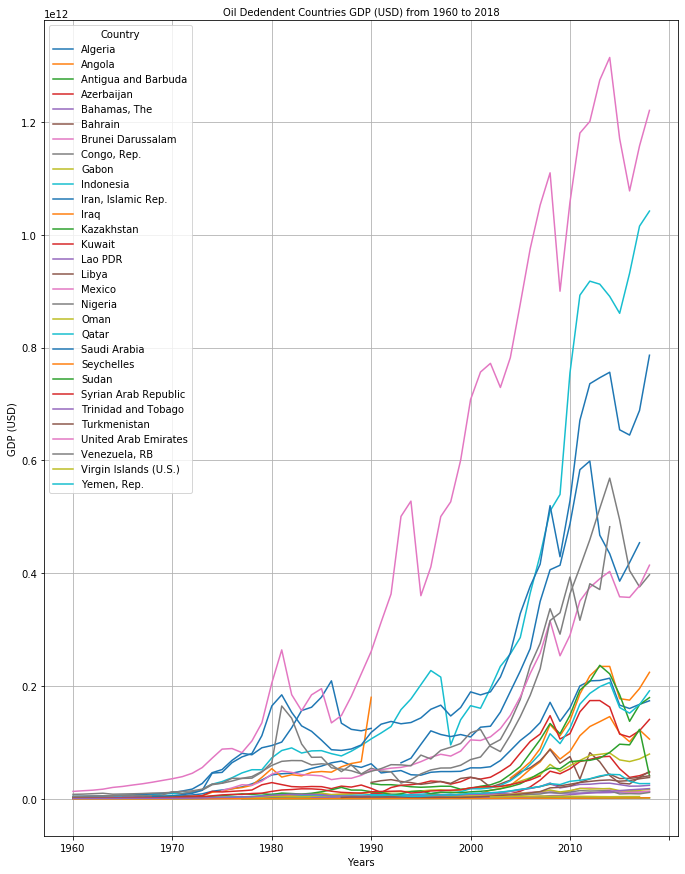

In [75]:
fig = plt.figure() # create figure

ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**



# Subplot 2: Line plot
Oil_Countries_GDP.plot(kind='line', figsize=(25, 15), ax=ax1,  fontsize=10)
ax1.set_title ('Oil Dedendent Countries GDP (USD) from 1960 to 2018', fontsize=10)
ax1.set_ylabel('GDP (USD)',  fontsize=10)
ax1.set_xlabel('Years',  fontsize=10)
plt.grid(True)
plt.show()

#### c) GDP Growth

In this step we'll obtain GDP growth (%) data from the Wold Bank for the same 30 countries from 1960 to 2018

In [31]:
wb.search_indicators('gdp growth')

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
5.51.01.10.gdp,Per capita GDP growth,,Statistical Capacity Indicators,GDP per capita is the sum of gross value added...,World Development Indicator (WDI) databank. Or...,
6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,World Development Indicators (World Bank),Economy & Growth
GFDD.OI.19,"Banking crisis dummy (1=banking crisis, 0=none)",,Global Financial Development,A banking crisis is defined as systemic if two...,"Luc Laeven and Fabián Valencia, 2012. “Systemi...",Financial Sector
NV.AGR.TOTL.ZG,Real agricultural GDP growth rates (%),,Africa Development Indicators,This is the annual rate of growth of agricultu...,World Bank country economists.,
NY.GDP.MKTP.KD.ZG,GDP growth (annual %),,World Development Indicators,Annual percentage growth rate of GDP at market...,"World Bank national accounts data, and OECD Na...",Economy & Growth
NY.GDP.MKTP.KN.87.ZG,GDP growth (annual %),,WDI Database Archives,,,


In [32]:
df4 = wb.get_series('NY.GDP.MKTP.KD.ZG', mrv =100).reset_index()
df4.head()

,Country,Series,Year,NY.GDP.MKTP.KD.ZG
0,Arab World,GDP growth (annual %),1961,NaN
1,Arab World,GDP growth (annual %),1962,NaN
2,Arab World,GDP growth (annual %),1963,NaN
3,Arab World,GDP growth (annual %),1964,NaN
4,Arab World,GDP growth (annual %),1965,NaN


In [33]:
df4= df4 [['Country','Year','NY.GDP.MKTP.KD.ZG']]
df4

,Country,Year,NY.GDP.MKTP.KD.ZG
0,Arab World,1961,NaN
1,Arab World,1962,NaN
2,Arab World,1963,NaN
3,Arab World,1964,NaN
4,Arab World,1965,NaN
...,...,...,...
15307,Zimbabwe,2014,2.376929
15308,Zimbabwe,2015,1.779873
15309,Zimbabwe,2016,0.755869
15310,Zimbabwe,2017,4.704035


In [34]:
df4= df4.rename(columns={"NY.GDP.MKTP.KD.ZG":'GDP Annual Growth'})
df4

,Country,Year,GDP Annual Growth
0,Arab World,1961,NaN
1,Arab World,1962,NaN
2,Arab World,1963,NaN
3,Arab World,1964,NaN
4,Arab World,1965,NaN
...,...,...,...
15307,Zimbabwe,2014,2.376929
15308,Zimbabwe,2015,1.779873
15309,Zimbabwe,2016,0.755869
15310,Zimbabwe,2017,4.704035


In [35]:
Oil_Countries_GDP_Growth = df4.pivot(index='Country', columns='Year', values='GDP Annual Growth')
Oil_Countries_GDP_Growth

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292,1.030660
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.350067,3.706891,2.545323,1.417524,1.001989,1.774487,2.218751,3.314805,3.821081,4.145238
Algeria,-13.605441,-19.685042,34.313729,5.839413,6.206898,-4.804971,9.452963,10.796239,8.433280,8.862657,...,1.600000,3.600000,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.300000,1.400000
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.237288,0.442478,0.293686,-4.392387,-2.756508,0.944882,1.404056,-2.769231,-5.854430,2.184874
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.690654,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.724022,1.629345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.662535,8.099089,12.413636,6.284236,2.217422,-0.181891,3.428732,4.708435,3.140237,0.905278
World,4.300340,5.553578,5.353422,6.714787,5.519477,5.769478,4.486744,6.314966,6.116461,3.535880,...,-1.678389,4.299175,3.132457,2.507626,2.655492,2.835050,2.857257,2.585116,3.196562,3.058395
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.866230,7.702307,-12.714897,2.392990,4.823519,-0.188690,-16.678463,-13.621458,-5.942320,-2.701475


In [36]:
Oil_Countries_GDP_Growth = Oil_Countries_GDP_Growth.transpose() 

Oil_Countries_GDP_Growth.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961,NaN,NaN,-13.605441,NaN,NaN,NaN,NaN,NaN,5.427843,NaN,...,NaN,NaN,3.192519,NaN,NaN,NaN,4.300340,NaN,1.361382,6.316157
1962,NaN,NaN,-19.685042,NaN,NaN,NaN,NaN,NaN,-0.852022,NaN,...,NaN,NaN,8.532934,NaN,NaN,NaN,5.553578,NaN,-2.490839,1.434471
1963,NaN,NaN,34.313729,NaN,NaN,NaN,NaN,NaN,-5.308197,NaN,...,NaN,NaN,3.900951,NaN,NaN,NaN,5.353422,NaN,3.272393,6.244345
1964,NaN,NaN,5.839413,NaN,NaN,NaN,NaN,NaN,10.130298,NaN,...,NaN,NaN,11.129345,NaN,NaN,NaN,6.714787,NaN,12.214048,-1.106172
1965,NaN,NaN,6.206898,NaN,NaN,NaN,NaN,NaN,10.569433,NaN,...,NaN,NaN,4.162867,NaN,NaN,NaN,5.519477,NaN,16.647456,4.910571


In [37]:
Oil_Countries_GDP_Growth= Oil_Countries_GDP_Growth[['Algeria', 'Angola', 'Azerbaijan',
       'Bahrain', 'Brunei Darussalam',
       'Congo, Rep.', 'Gabon', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Libya', 'Mexico', 'Nigeria', 'Oman', 'Qatar',
       'Saudi Arabia', 'Sudan',
       'Trinidad and Tobago', 'Turkmenistan',
       'United Arab Emirates', 'Venezuela, RB',
       'Yemen, Rep.']]

In [38]:
Oil_Countries_GDP_Growth.head()

Country,Algeria,Angola,Azerbaijan,Bahrain,Brunei Darussalam,"Congo, Rep.",Gabon,Indonesia,"Iran, Islamic Rep.",Iraq,...,Nigeria,Oman,Qatar,Saudi Arabia,Sudan,Trinidad and Tobago,Turkmenistan,United Arab Emirates,"Venezuela, RB","Yemen, Rep."
Year,,,,,,,,,,,,,,,,,,,,,
1961,-13.605441,NaN,NaN,NaN,NaN,8.350727,14.766843,5.740646,11.477601,NaN,...,0.191795,NaN,NaN,NaN,0.022391,14.037071,NaN,NaN,3.192519,NaN
1962,-19.685042,NaN,NaN,NaN,NaN,5.202309,7.449212,1.841978,8.590433,NaN,...,4.102993,NaN,NaN,NaN,6.915842,2.742463,NaN,NaN,8.532934,NaN
1963,34.313729,NaN,NaN,NaN,NaN,-4.029300,6.092435,-2.237030,7.274456,NaN,...,8.578619,NaN,NaN,NaN,-2.846972,5.604597,NaN,NaN,3.900951,NaN
1964,5.839413,NaN,NaN,NaN,NaN,3.816796,4.554454,3.529698,9.193939,NaN,...,4.950489,NaN,NaN,NaN,-1.120449,7.630500,NaN,NaN,11.129345,NaN
1965,6.206898,NaN,NaN,NaN,NaN,3.676468,8.333336,1.081589,17.217673,NaN,...,4.884977,NaN,NaN,NaN,6.777074,0.693850,NaN,NaN,4.162867,NaN


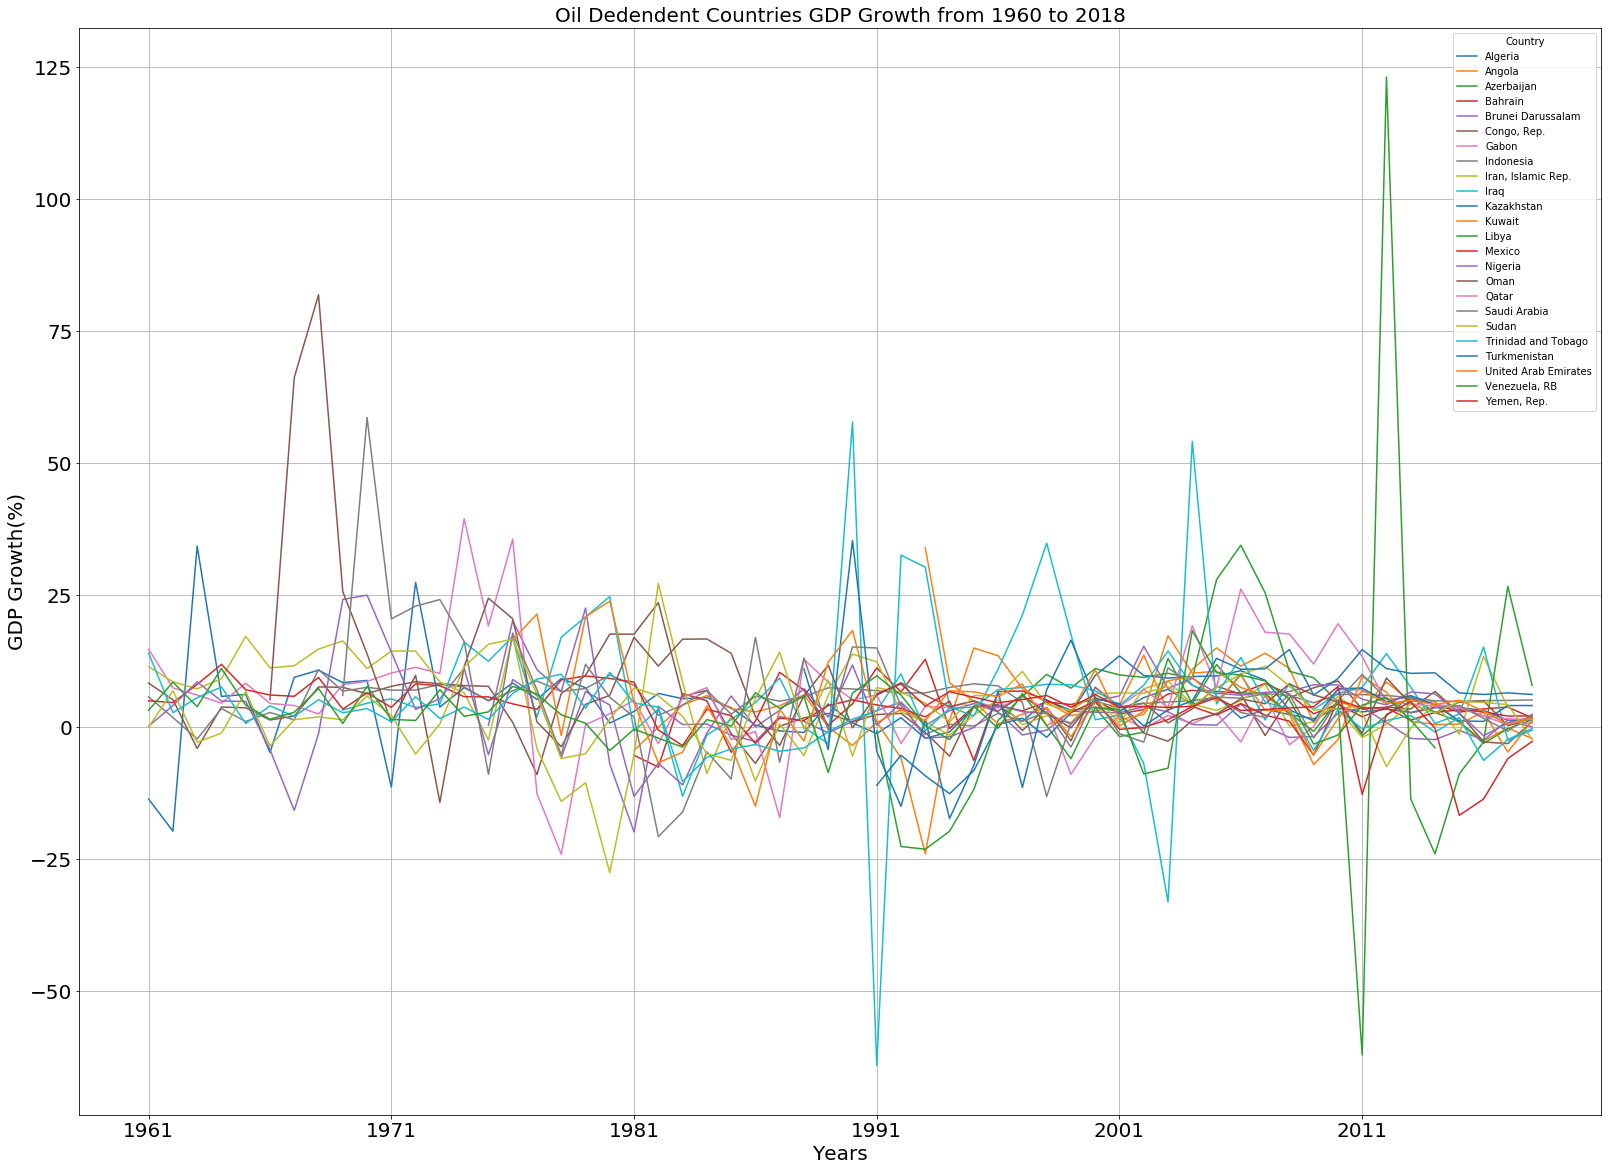

In [76]:
fig = plt.figure() # create figure

ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**



# Subplot 2: Line plot
Oil_Countries_GDP_Growth.plot(kind='line', figsize=(60, 20), ax=ax1,  fontsize=20)
ax1.set_title ('Oil Dedendent Countries GDP Growth from 1960 to 2018', fontsize=20)
ax1.set_ylabel('GDP Growth(%)', fontsize=20)
ax1.set_xlabel('Years', fontsize=20)
plt.grid(True)
plt.show()

#### d) GDP per Capita

To take into account the population size of countries I obtained GDP per capita data from the World Bank for the same 30 countries from 1960 to 2018.

In [40]:
wb.search_indicators('gdp per capita')

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
5.51.01.10.gdp,Per capita GDP growth,,Statistical Capacity Indicators,GDP per capita is the sum of gross value added...,World Development Indicator (WDI) databank. Or...,
6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,World Development Indicators (World Bank),Economy & Growth
FB.DPT.INSU.PC.ZS,Deposit insurance coverage (% of GDP per capita),,WDI Database Archives,,,
NV.AGR.PCAP.KD.ZG,Real agricultural GDP per capita growth rate (%),,Africa Development Indicators,The growth rate of real per capita GDP in agri...,World Bank country economists.,
NY.GDP.PCAP.CD,GDP per capita (current US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"World Bank national accounts data, and OECD Na...",Economy & Growth
...,...,...,...,...,...,...
UIS.XUNIT.GDPCAP.23.FSGOV,Initial government funding per secondary stude...,,Education Statistics,"Total general (local, regional and central, cu...",UNESCO Institute for Statistics,
UIS.XUNIT.GDPCAP.23.FSHH,Initial household funding per secondary studen...,,Education Statistics,"Total payments of households (pupils, students...",UNESCO Institute for Statistics,
UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,,Education Statistics,"Total general (local, regional and central, cu...",UNESCO Institute for Statistics,


In [81]:
df5 = wb.get_series('NY.GDP.PCAP.CD', mrv =100).reset_index()
df5.head()

,Country,Series,Year,NY.GDP.PCAP.CD
0,Arab World,GDP per capita (current US$),1960,NaN
1,Arab World,GDP per capita (current US$),1961,NaN
2,Arab World,GDP per capita (current US$),1962,NaN
3,Arab World,GDP per capita (current US$),1963,NaN
4,Arab World,GDP per capita (current US$),1964,NaN


In [82]:
df5= df5.rename(columns={"NY.GDP.PCAP.CD":'GDP Per Capita'})
df5

,Country,Series,Year,GDP Per Capita
0,Arab World,GDP per capita (current US$),1960,NaN
1,Arab World,GDP per capita (current US$),1961,NaN
2,Arab World,GDP per capita (current US$),1962,NaN
3,Arab World,GDP per capita (current US$),1963,NaN
4,Arab World,GDP per capita (current US$),1964,NaN
...,...,...,...,...
15571,Zimbabwe,GDP per capita (current US$),2014,1434.899340
15572,Zimbabwe,GDP per capita (current US$),2015,1445.071062
15573,Zimbabwe,GDP per capita (current US$),2016,1464.583529
15574,Zimbabwe,GDP per capita (current US$),2017,1602.403507


In [83]:
Oil_Countries_GDP_per_Capita = df5.pivot(index='Country', columns='Year', values='GDP Per Capita')
Oil_Countries_GDP_per_Capita

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,129.108323,129.329713,...,438.076034,543.303042,591.162346,641.872034,637.165044,613.856333,578.466353,547.228110,556.302139,520.896603
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.140150,4094.362119,4437.178067,4247.614279,4413.081743,4578.666720,3952.829458,4124.108907,4532.890162,5268.848504
Algeria,246.308763,214.776274,172.245998,226.899989,238.048532,249.883486,235.598112,253.923651,281.925745,302.752307,...,3883.378143,4480.724539,5455.741338,5592.326098,5499.581487,5493.025590,4177.867517,3946.421445,4044.298372,4114.715061
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11961.258226,10271.224523,10294.302265,11568.793001,11505.393714,11507.232349,11843.331183,11696.955562,10823.444804,11466.690706
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43338.866758,39736.354063,41100.729938,38392.943901,40626.751632,42300.334128,36039.653496,37224.108916,39134.393371,42029.762737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1970.182963,2354.125987,2695.193853,2834.021525,3060.312389,3046.821798,2967.851747,3074.291152,3254.485887,3198.866644
World,452.054396,463.989953,489.482244,516.545173,554.482125,591.653256,628.654101,655.796774,693.853421,749.642687,...,8820.946091,9541.597373,10479.574616,10595.545779,10771.834565,10935.359628,10225.507976,10258.006620,10780.813152,11317.270583
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1116.084594,1334.784845,1374.621313,1446.536280,1607.152275,1674.002766,1608.744312,1139.870568,963.494721,944.408499


In [84]:
Oil_Countries_GDP_per_Capita = Oil_Countries_GDP_per_Capita.transpose() 
Oil_Countries_GDP_per_Capita.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,59.773194,NaN,246.308763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,955.446183,NaN,NaN,NaN,452.054396,NaN,232.188867,278.813699
1961,59.860874,NaN,214.776274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,970.356398,NaN,NaN,NaN,463.989953,NaN,220.042137,280.828951
1962,58.458015,NaN,172.245998,NaN,NaN,NaN,NaN,NaN,1155.890170,NaN,...,NaN,NaN,1023.355588,NaN,NaN,NaN,489.482244,NaN,212.578123,276.688781
1963,78.706388,NaN,226.899989,NaN,NaN,NaN,NaN,NaN,850.304737,NaN,...,NaN,NaN,1077.402694,NaN,NaN,NaN,516.545173,NaN,213.896441,277.479715
1964,82.095231,NaN,238.048532,NaN,NaN,NaN,NaN,NaN,1173.238213,NaN,...,NaN,NaN,864.471682,NaN,NaN,NaN,554.482125,NaN,242.384333,281.558440


In [85]:
Oil_Countries_GDP_per_Capita= Oil_Countries_GDP_per_Capita[['Algeria', 'Angola', 'Azerbaijan',
       'Bahrain', 'Brunei Darussalam',
       'Congo, Rep.', 'Gabon', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Libya', 'Mexico', 'Nigeria', 'Oman', 'Qatar',
       'Saudi Arabia', 'Sudan',
       'Trinidad and Tobago', 'Turkmenistan',
       'United Arab Emirates', 'Venezuela, RB',
       'Yemen, Rep.']]

In [86]:
Oil_Countries_GDP_per_Capita.head()

Country,Algeria,Angola,Azerbaijan,Bahrain,Brunei Darussalam,"Congo, Rep.",Gabon,Indonesia,"Iran, Islamic Rep.",Iraq,...,Nigeria,Oman,Qatar,Saudi Arabia,Sudan,Trinidad and Tobago,Turkmenistan,United Arab Emirates,"Venezuela, RB","Yemen, Rep."
Year,,,,,,,,,,,,,,,,,,,,,
1960,246.308763,NaN,NaN,NaN,NaN,129.370463,282.413795,NaN,191.680781,231.025649,...,92.960470,NaN,NaN,NaN,125.859851,631.702115,NaN,NaN,955.446183,NaN
1961,214.776274,NaN,NaN,NaN,NaN,145.406397,331.431868,NaN,196.925082,245.032054,...,96.979045,NaN,NaN,NaN,133.082209,676.398050,NaN,NaN,970.356398,NaN
1962,172.245998,NaN,NaN,NaN,NaN,155.738236,357.522363,NaN,203.437317,254.701434,...,104.387020,NaN,NaN,NaN,140.725111,704.219154,NaN,NaN,1023.355588,NaN
1963,226.899989,NaN,NaN,NaN,NaN,157.055866,298.466410,NaN,208.132361,250.787110,...,107.540568,NaN,NaN,NaN,139.309903,760.401295,NaN,NaN,1077.402694,NaN
1964,238.048532,NaN,NaN,NaN,NaN,165.009459,410.900952,NaN,221.321237,288.163553,...,113.168721,NaN,NaN,NaN,139.223303,788.702764,NaN,NaN,864.471682,NaN


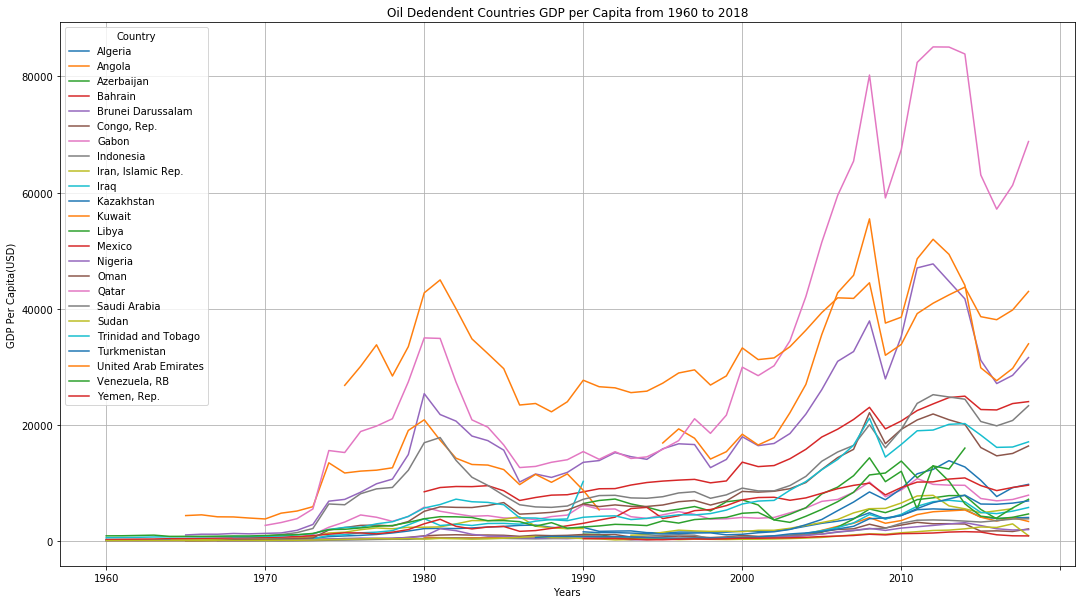

In [88]:
fig = plt.figure() # create figure

ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**



# Subplot 2: Line plot
Oil_Countries_GDP_per_Capita.plot(kind='line', figsize=(40, 10), ax=ax1) 
ax1.set_title ('Oil Dedendent Countries GDP per Capita from 1960 to 2018')
ax1.set_ylabel('GDP Per Capita(USD)')
ax1.set_xlabel('Years')
plt.grid(True)
plt.show()

### e) GDP per Capita Growth

In [89]:
df6 = wb.get_series('NY.GDP.PCAP.KD.ZG', mrv =100).reset_index()
df6.head()

,Country,Series,Year,NY.GDP.PCAP.KD.ZG
0,Arab World,GDP per capita growth (annual %),1961,NaN
1,Arab World,GDP per capita growth (annual %),1962,NaN
2,Arab World,GDP per capita growth (annual %),1963,NaN
3,Arab World,GDP per capita growth (annual %),1964,NaN
4,Arab World,GDP per capita growth (annual %),1965,NaN


In [91]:
df6= df6.rename(columns={"NY.GDP.PCAP.KD.ZG":'GDP Per Capita Annual Growth'})
df6

,Country,Series,Year,GDP Per Capita Annual Growth
0,Arab World,GDP per capita growth (annual %),1961,NaN
1,Arab World,GDP per capita growth (annual %),1962,NaN
2,Arab World,GDP per capita growth (annual %),1963,NaN
3,Arab World,GDP per capita growth (annual %),1964,NaN
4,Arab World,GDP per capita growth (annual %),1965,NaN
...,...,...,...,...
15307,Zimbabwe,GDP per capita growth (annual %),2014,0.596198
15308,Zimbabwe,GDP per capita growth (annual %),2015,0.100456
15309,Zimbabwe,GDP per capita growth (annual %),2016,-0.793566
15310,Zimbabwe,GDP per capita growth (annual %),2017,3.186399


In [92]:
Oil_Countries_GDP_per_Capita_Growth = df6.pivot(index='Country', columns='Year', values='GDP Per Capita Annual Growth')
Oil_Countries_GDP_per_Capita_Growth

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.515369,11.264133,-2.681081,8.974880,1.974169,-0.665271,-1.622887,-0.541697,0.082079,-1.350178
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.048889,4.223037,2.821559,1.585155,1.187205,1.985426,2.516852,3.480117,3.916612,4.402515
Algeria,-15.727715,-21.644486,31.010513,3.164589,3.421089,-7.400108,6.382522,7.645480,5.363136,5.827723,...,-0.134668,1.746776,0.980205,1.401797,0.761675,1.710450,1.600478,1.104568,-0.750500,-0.615183
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.870529,1.524296,0.869270,-4.234377,-2.836798,0.803753,1.365902,-2.645383,-5.649619,2.470435
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.375947,-5.343136,-3.847253,-0.039668,2.405292,4.293204,2.395989,2.830284,2.115060,1.622747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.801803,5.327862,9.610522,3.693570,-0.207438,-2.494494,1.086643,2.382790,1.109362,-1.618564
World,2.907020,3.764473,3.203568,4.568027,3.394727,3.585405,2.391344,4.197035,3.919475,1.415386,...,-2.867256,3.058357,1.938956,1.307516,1.453617,1.635076,1.668747,1.405086,2.030472,1.932469
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.986330,4.732882,-15.107994,-0.391763,2.014297,-2.802976,-18.799099,-15.752675,-8.194890,-4.968007


In [93]:
Oil_Countries_GDP_per_Capita_Growth = Oil_Countries_GDP_per_Capita_Growth.transpose() 
Oil_Countries_GDP_per_Capita_Growth.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961,NaN,NaN,-15.727715,NaN,NaN,NaN,NaN,NaN,3.728788,NaN,...,NaN,NaN,-0.444235,NaN,NaN,NaN,2.907020,NaN,-1.635355,2.821694
1962,NaN,NaN,-21.644486,NaN,NaN,NaN,NaN,NaN,-2.425908,NaN,...,NaN,NaN,4.765083,NaN,NaN,NaN,3.764473,NaN,-5.371302,-1.934799
1963,NaN,NaN,31.010513,NaN,NaN,NaN,NaN,NaN,-6.788178,NaN,...,NaN,NaN,0.344579,NaN,NaN,NaN,3.203568,NaN,0.215686,2.696914
1964,NaN,NaN,3.164589,NaN,NaN,NaN,NaN,NaN,8.437234,NaN,...,NaN,NaN,7.375717,NaN,NaN,NaN,4.568027,NaN,8.873139,-4.403539
1965,NaN,NaN,3.421089,NaN,NaN,NaN,NaN,NaN,8.896770,NaN,...,NaN,NaN,0.689631,NaN,NaN,NaN,3.394727,NaN,13.143554,1.430521


In [94]:
Oil_Countries_GDP_per_Capita_Growth= Oil_Countries_GDP_per_Capita_Growth[['Algeria', 'Angola', 'Azerbaijan',
       'Bahrain', 'Brunei Darussalam',
       'Congo, Rep.', 'Gabon', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Libya', 'Mexico', 'Nigeria', 'Oman', 'Qatar',
       'Saudi Arabia', 'Sudan',
       'Trinidad and Tobago', 'Turkmenistan',
       'United Arab Emirates', 'Venezuela, RB',
       'Yemen, Rep.']]
Oil_Countries_GDP_per_Capita_Growth.head()

Country,Algeria,Angola,Azerbaijan,Bahrain,Brunei Darussalam,"Congo, Rep.",Gabon,Indonesia,"Iran, Islamic Rep.",Iraq,...,Nigeria,Oman,Qatar,Saudi Arabia,Sudan,Trinidad and Tobago,Turkmenistan,United Arab Emirates,"Venezuela, RB","Yemen, Rep."
Year,,,,,,,,,,,,,,,,,,,,,
1961,-15.727715,NaN,NaN,NaN,NaN,5.768153,13.661603,2.985794,8.633888,NaN,...,-1.820379,NaN,NaN,NaN,-2.583628,11.816638,NaN,NaN,-0.444235,NaN
1962,-21.644486,NaN,NaN,NaN,NaN,2.632166,6.295884,-0.821881,5.809024,NaN,...,1.964127,NaN,NaN,NaN,4.084864,1.034102,NaN,NaN,4.765083,NaN
1963,31.010513,NaN,NaN,NaN,NaN,-6.427172,4.802510,-4.806156,4.515870,NaN,...,6.311081,NaN,NaN,NaN,-5.459294,4.124264,NaN,NaN,0.344579,NaN
1964,3.164589,NaN,NaN,NaN,NaN,1.167851,3.097370,0.791335,6.374672,NaN,...,2.739205,NaN,NaN,NaN,-3.818973,6.358294,NaN,NaN,7.375717,NaN
1965,3.421089,NaN,NaN,NaN,NaN,0.980897,6.613769,-1.610432,14.178533,NaN,...,2.664660,NaN,NaN,NaN,3.821197,-0.313820,NaN,NaN,0.689631,NaN


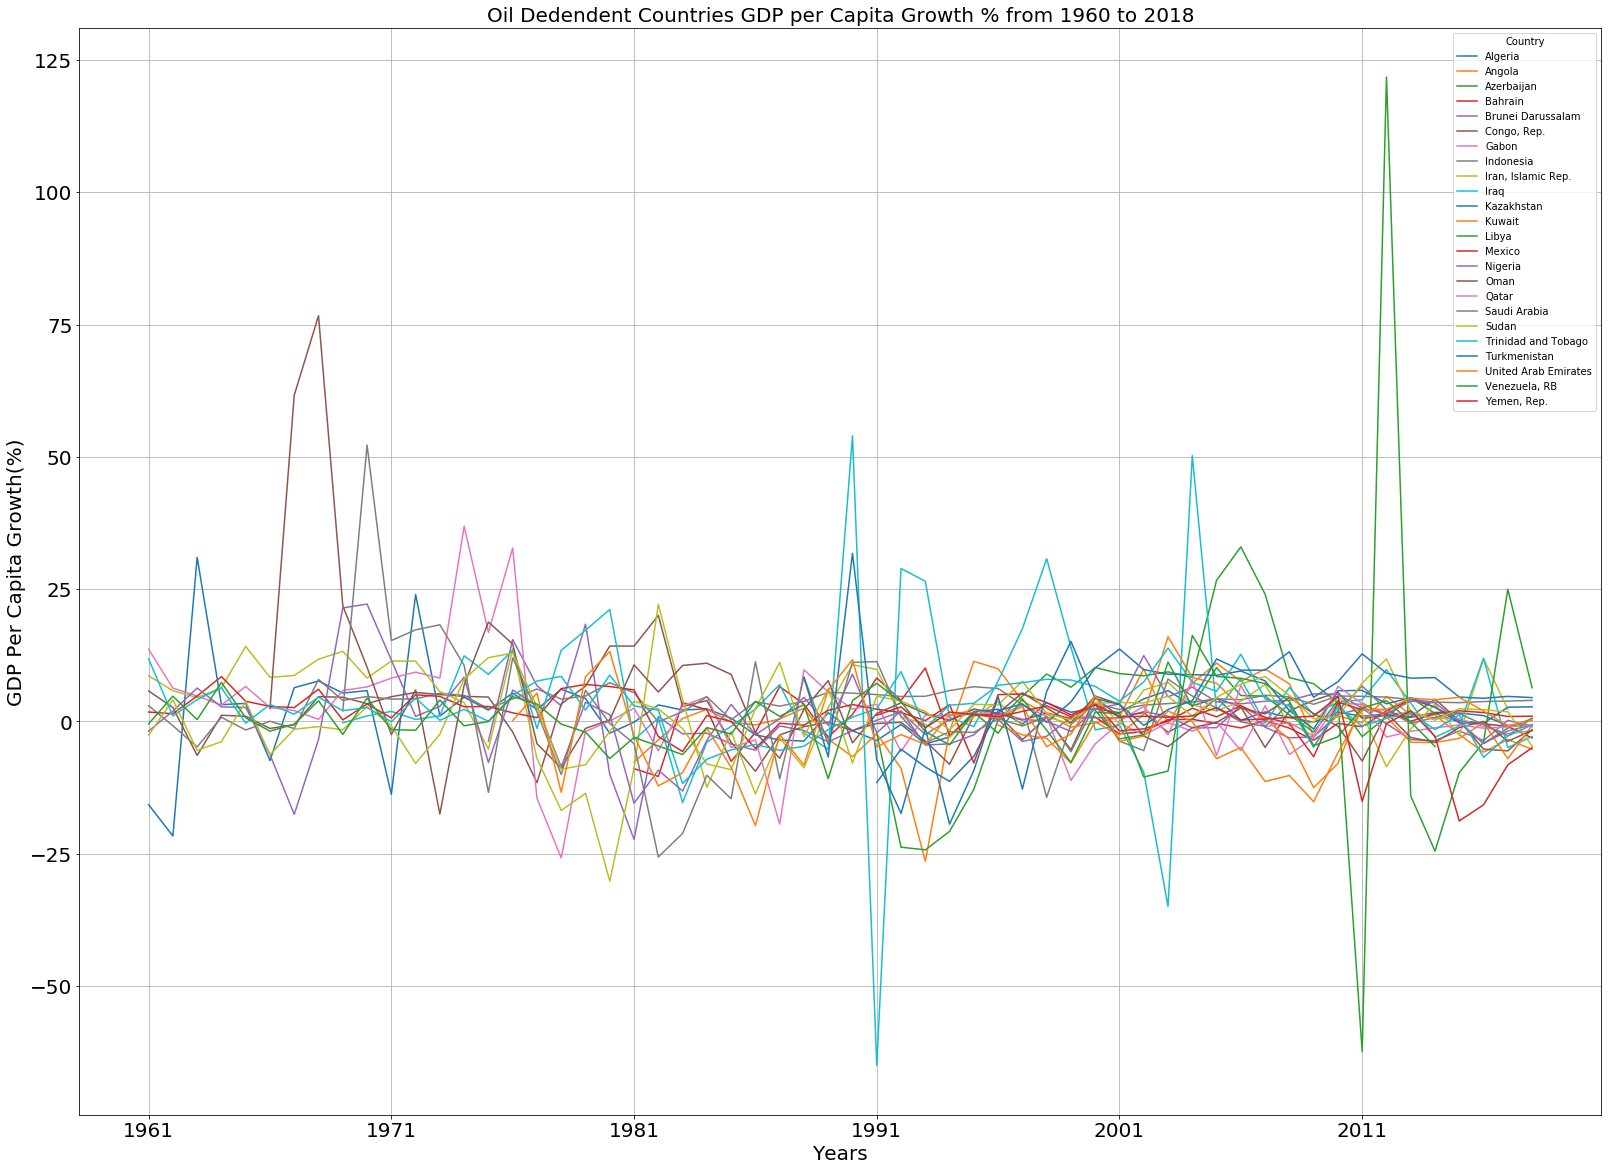

In [95]:
fig = plt.figure() # create figure

ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**



# Subplot 2: Line plot
Oil_Countries_GDP_per_Capita_Growth.plot(kind='line', figsize=(60, 20), ax=ax1, fontsize=20) 
ax1.set_title ('Oil Dedendent Countries GDP per Capita Growth % from 1960 to 2018',fontsize=20)
ax1.set_ylabel('GDP Per Capita Growth(%)',fontsize=20)
ax1.set_xlabel('Years',fontsize=20)
plt.grid(True)
plt.show()

### 2) Oil and Gas Field Discoveries

To better evaluate the impact of oil and discoveries we need to look at historical data. We used panda csv reader to directly pull a table of the discoveries that occurred worldwide throughout the 20th century. The table is available through the Harvard website. Since the world bank data only covers the period from 1960-2018 we will select only the discoveries made during that same period. 

In [54]:
df = pd.read_csv("http://worldmap.harvard.edu/download/wfs/14675/csv?outputFormat=csv&service=WFS&request=GetFeature&format_options=charset%3AUTF-8&typename=geonode%3Agiant_oil_and_gas_fields_of_the_world_co_yxz&version=1.0.0")
# take a look at the dataset
df.head()

,FID,the_geom,FIELD_ID,FLD_NAME,FLD_NAME2,REG_CODE,REG_NAME,COUNTRY,STATE,LAT_DD,...,SERIES,STAGE,AGE_CODE,RSVR_DEPFT,RSVR_DEPKM,TRAP_CLASS,TRAP_TYPE,TRAP_DESC,REFERENCES,COMMENTS
0,giant_oil_and_gas_fields_of_the_world_co_yxz.1,POINT (-92 26),995.0,Julia,NaN,A,NORTH AMERICA,United States,USA - Gulf of Mexico Deepwater,26.000000,...,NaN,NaN,NaN,-99999.99,-99999.99,Unknown,NaN,NaN,1203,NaN
1,giant_oil_and_gas_fields_of_the_world_co_yxz.2,POINT (11.86126 -8.828139),996.0,Pazflor,NaN,F,AFRICA,Angola,NaN,-8.828139,...,NaN,NaN,NaN,-99999.99,-99999.99,Unknown,NaN,NaN,NaN,NaN
2,giant_oil_and_gas_fields_of_the_world_co_yxz.3,POINT (47.266667 31.1),1.0,West Qurna,NaN,E,MIDDLE EAST,Iraq,NaN,31.100000,...,Lower Cretaceous,NaN,MZ_CT_L,12139.00,3.70,Structural,Anticline,Anticlinal shoals,"3, 38, 73, 74, 75, 883, 949",NaN
3,giant_oil_and_gas_fields_of_the_world_co_yxz.4,POINT (72.1 19.166667),2.0,Bassein,NaN,G,ASIA AND OCEANIA,India,NaN,19.166667,...,Miocene,NaN,CZ_NG_MIO,6000.00,1.83,Structural,Anticline,NaN,"2, 3, 290, 291",NaN
4,giant_oil_and_gas_fields_of_the_world_co_yxz.5,POINT (49.87899 30.99227),3.0,Karanj,NaN,E,MIDDLE EAST,Iran,NaN,30.992270,...,Oligocene,NaN,CZ_PG_OLI,5492.00,1.67,Structural,Anticline,NaN,"1, 2, 3, 38, 653, 646, 1094",NaN


In [55]:
missing_data = df.isnull()
missing_data.head(5)

,FID,the_geom,FIELD_ID,FLD_NAME,FLD_NAME2,REG_CODE,REG_NAME,COUNTRY,STATE,LAT_DD,...,SERIES,STAGE,AGE_CODE,RSVR_DEPFT,RSVR_DEPKM,TRAP_CLASS,TRAP_TYPE,TRAP_DESC,REFERENCES,COMMENTS
0,False,False,False,False,True,False,False,False,False,False,...,True,True,True,False,False,False,True,True,False,True
1,False,False,False,False,True,False,False,False,True,False,...,True,True,True,False,False,False,True,True,True,True
2,False,False,False,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True


In [56]:
print(df.dtypes)

FID            object
the_geom       object
FIELD_ID      float64
FLD_NAME       object
FLD_NAME2      object
               ...   
TRAP_CLASS     object
TRAP_TYPE      object
TRAP_DESC      object
REFERENCES     object
COMMENTS       object
Length: 44, dtype: object


In [57]:
df1= df [['REG_NAME','COUNTRY','FLD_NAME','LAT_DD','LON_DD','DISC_YR','EUR_MMBOE','RSVS_MMBOE']]
df1

,REG_NAME,COUNTRY,FLD_NAME,LAT_DD,LON_DD,DISC_YR,EUR_MMBOE,RSVS_MMBOE
0,NORTH AMERICA,United States,Julia,26.000000,-92.000000,2007.0,1000.000,1000.000
1,AFRICA,Angola,Pazflor,-8.828139,11.861260,2008.0,590.000,590.000
2,MIDDLE EAST,Iraq,West Qurna,31.100000,47.266667,1973.0,11374.167,4204.653
3,ASIA AND OCEANIA,India,Bassein,19.166667,72.100000,1977.0,1362.613,560.556
4,MIDDLE EAST,Iran,Karanj,30.992270,49.878990,1963.0,6513.940,1881.263
...,...,...,...,...,...,...,...,...
992,MIDDLE EAST,Iran,Jofeyr,31.000000,48.000000,2008.0,500.000,500.000
993,CENTRAL AND SOUTH AMERICA,Colombia,Boral-1,5.000000,-72.700000,2008.0,3000.000,1000.000
994,EASTERN EUROPE AND FORMER USSR,Russia,Angaro-Lunskoye,54.500000,107.000000,2007.0,7000.000,7000.000
995,MIDDLE EAST,Iraq,Taq Taq (Kurdistan),36.000000,44.700000,2009.0,5000.000,5000.000


In [58]:
df1.dropna(how='all')

,REG_NAME,COUNTRY,FLD_NAME,LAT_DD,LON_DD,DISC_YR,EUR_MMBOE,RSVS_MMBOE
0,NORTH AMERICA,United States,Julia,26.000000,-92.000000,2007.0,1000.000,1000.000
1,AFRICA,Angola,Pazflor,-8.828139,11.861260,2008.0,590.000,590.000
2,MIDDLE EAST,Iraq,West Qurna,31.100000,47.266667,1973.0,11374.167,4204.653
3,ASIA AND OCEANIA,India,Bassein,19.166667,72.100000,1977.0,1362.613,560.556
4,MIDDLE EAST,Iran,Karanj,30.992270,49.878990,1963.0,6513.940,1881.263
...,...,...,...,...,...,...,...,...
991,CENTRAL AND SOUTH AMERICA,Brazil,1-BRSA-607-SPS (1-SPS-56) CAMPOS,-26.091000,-46.490400,2008.0,500.000,500.000
992,MIDDLE EAST,Iran,Jofeyr,31.000000,48.000000,2008.0,500.000,500.000
993,CENTRAL AND SOUTH AMERICA,Colombia,Boral-1,5.000000,-72.700000,2008.0,3000.000,1000.000
994,EASTERN EUROPE AND FORMER USSR,Russia,Angaro-Lunskoye,54.500000,107.000000,2007.0,7000.000,7000.000


In [59]:
df1 = df1.fillna(0)

In [60]:
missing_data = df1.isnull()
missing_data.head(5)

,REG_NAME,COUNTRY,FLD_NAME,LAT_DD,LON_DD,DISC_YR,EUR_MMBOE,RSVS_MMBOE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [61]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

REG_NAME
False    997
Name: REG_NAME, dtype: int64

COUNTRY
False    997
Name: COUNTRY, dtype: int64

FLD_NAME
False    997
Name: FLD_NAME, dtype: int64

LAT_DD
False    997
Name: LAT_DD, dtype: int64

LON_DD
False    997
Name: LON_DD, dtype: int64

DISC_YR
False    997
Name: DISC_YR, dtype: int64

EUR_MMBOE
False    997
Name: EUR_MMBOE, dtype: int64

RSVS_MMBOE
False    997
Name: RSVS_MMBOE, dtype: int64



In [62]:
df1.dtypes

REG_NAME       object
COUNTRY        object
FLD_NAME       object
LAT_DD        float64
LON_DD        float64
DISC_YR       float64
EUR_MMBOE     float64
RSVS_MMBOE    float64
dtype: object

In [63]:
df1[["RSVS_MMBOE", "EUR_MMBOE","DISC_YR"]] = df1[["RSVS_MMBOE", "EUR_MMBOE","DISC_YR"]].astype("int")

In [64]:
df1.dtypes

REG_NAME       object
COUNTRY        object
FLD_NAME       object
LAT_DD        float64
LON_DD        float64
DISC_YR         int64
EUR_MMBOE       int64
RSVS_MMBOE      int64
dtype: object

In [65]:
df1

,REG_NAME,COUNTRY,FLD_NAME,LAT_DD,LON_DD,DISC_YR,EUR_MMBOE,RSVS_MMBOE
0,NORTH AMERICA,United States,Julia,26.000000,-92.000000,2007,1000,1000
1,AFRICA,Angola,Pazflor,-8.828139,11.861260,2008,590,590
2,MIDDLE EAST,Iraq,West Qurna,31.100000,47.266667,1973,11374,4204
3,ASIA AND OCEANIA,India,Bassein,19.166667,72.100000,1977,1362,560
4,MIDDLE EAST,Iran,Karanj,30.992270,49.878990,1963,6513,1881
...,...,...,...,...,...,...,...,...
992,MIDDLE EAST,Iran,Jofeyr,31.000000,48.000000,2008,500,500
993,CENTRAL AND SOUTH AMERICA,Colombia,Boral-1,5.000000,-72.700000,2008,3000,1000
994,EASTERN EUROPE AND FORMER USSR,Russia,Angaro-Lunskoye,54.500000,107.000000,2007,7000,7000
995,MIDDLE EAST,Iraq,Taq Taq (Kurdistan),36.000000,44.700000,2009,5000,5000


In [66]:
df1.rename(columns={"REG_NAME":'Region',"COUNTRY":'Country',"LAT_DD":'Latitude',"LON_DD":'Longitude',"DISC_YR":'Year',"FLD_NAME":'Field Name',"EUR_MMBOE":'Field_Size_MM_Barrels',"RSVS_MMBOE":'Reserves'}, inplace=True)
df1

,Region,Country,Field Name,Latitude,Longitude,Year,Field_Size_MM_Barrels,Reserves
0,NORTH AMERICA,United States,Julia,26.000000,-92.000000,2007,1000,1000
1,AFRICA,Angola,Pazflor,-8.828139,11.861260,2008,590,590
2,MIDDLE EAST,Iraq,West Qurna,31.100000,47.266667,1973,11374,4204
3,ASIA AND OCEANIA,India,Bassein,19.166667,72.100000,1977,1362,560
4,MIDDLE EAST,Iran,Karanj,30.992270,49.878990,1963,6513,1881
...,...,...,...,...,...,...,...,...
992,MIDDLE EAST,Iran,Jofeyr,31.000000,48.000000,2008,500,500
993,CENTRAL AND SOUTH AMERICA,Colombia,Boral-1,5.000000,-72.700000,2008,3000,1000
994,EASTERN EUROPE AND FORMER USSR,Russia,Angaro-Lunskoye,54.500000,107.000000,2007,7000,7000
995,MIDDLE EAST,Iraq,Taq Taq (Kurdistan),36.000000,44.700000,2009,5000,5000


In [67]:
Oil_discoveries = df1 [['Country','Field Name','Year','Field_Size_MM_Barrels','Latitude','Longitude']]
Oil_discoveries

,Country,Field Name,Year,Field_Size_MM_Barrels,Latitude,Longitude
0,United States,Julia,2007,1000,26.000000,-92.000000
1,Angola,Pazflor,2008,590,-8.828139,11.861260
2,Iraq,West Qurna,1973,11374,31.100000,47.266667
3,India,Bassein,1977,1362,19.166667,72.100000
4,Iran,Karanj,1963,6513,30.992270,49.878990
...,...,...,...,...,...,...
992,Iran,Jofeyr,2008,500,31.000000,48.000000
993,Colombia,Boral-1,2008,3000,5.000000,-72.700000
994,Russia,Angaro-Lunskoye,2007,7000,54.500000,107.000000
995,Iraq,Taq Taq (Kurdistan),2009,5000,36.000000,44.700000


We now want to select only fields discovered from 1960 and 2018 to match with time period of our World bank Dataset

In [100]:
Oil_discoveries = Oil_discoveries.loc[Oil_discoveries["Year"] > 1960]
Oil_discoveries.sort_values(by='Year', ascending=True)

,Country,Field Name,Year,Field_Size_MM_Barrels,Latitude,Longitude
70,Libya,Gialo,1961,1135,28.686670,21.402780
107,Iran,Kharg Island-Doroud,1961,4079,29.192870,50.253500
444,Iraq,Luhais,1961,1143,30.351513,46.836498
487,Russia,Samotlor,1961,6619,61.121517,76.748950
440,Russia,Ust'-Bakykskoye,1961,2300,62.367328,72.856342
...,...,...,...,...,...,...
294,Ghana,Tulley Owo-1,2010,500,4.550000,-2.900000
972,Ethiopia,Genale B2X,2010,500,7.200000,43.800000
973,Azerbaijan,Umid,2010,700,39.760000,49.820000
986,Brazil,Waimea,2010,500,-24.560000,-40.310000


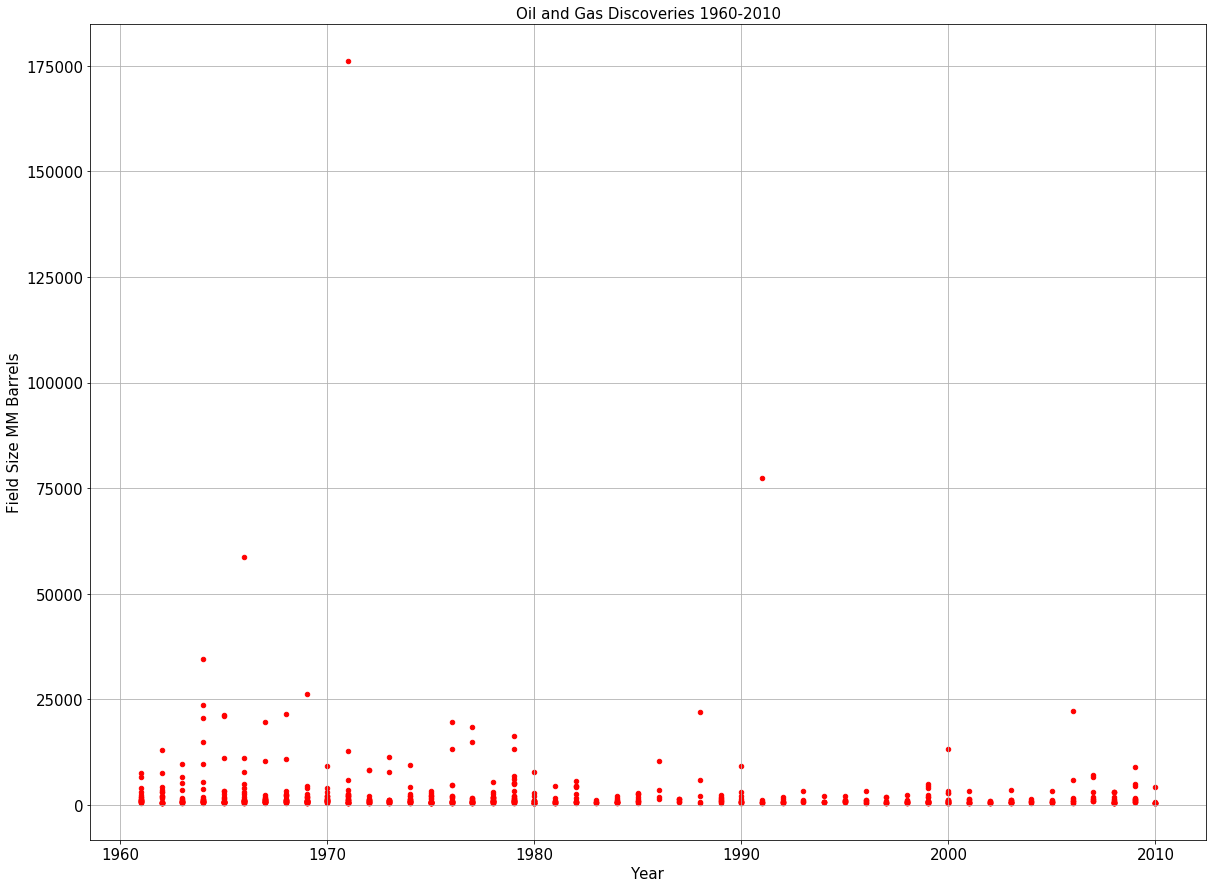

In [98]:
Oil_discoveries.plot(kind='scatter', x='Year', y='Field_Size_MM_Barrels', figsize=(20, 15), color='red', fontsize =15)

plt.title('Oil and Gas Discoveries 1960-2010', fontsize =15)
plt.xlabel('Year',fontsize =15)
plt.ylabel('Field Size MM Barrels',fontsize =15)
plt.grid(True)
plt.show()

Now let's calculate some stats about Field Size of these discoveries made between 1960 and 2018

In [117]:
Oil_discoveries['Field_Size_MM_Barrels'].describe()

count       745.000000
mean       2362.032215
std        8017.475067
min         498.000000
25%         600.000000
50%         850.000000
75%        1666.000000
max      176060.000000
Name: Field_Size_MM_Barrels, dtype: float64

In [71]:
#Show the Largest 20 Oil and Gas field discovered between 1960 and 2018
Top20Fields = Oil_discoveries.nlargest(20, 'Field_Size_MM_Barrels')
Top20Fields

,Country,Field Name,Year,Field_Size_MM_Barrels,Latitude,Longitude
245,Qatar,North Field,1971,176060,26.200000,51.700000
246,Iran,Pars South,1991,77446,26.499998,52.100002
354,Russia,Urengoy,1966,58606,67.021517,76.325203
58,Iran,Marun,1964,34508,31.041650,49.396658
356,Russia,Yamburg,1969,26177,68.046606,76.025286
117,UAE,Zakum,1964,23740,24.855560,53.701390
968,Turkmenistan,Yolotan/Osman,2006,22333,37.000000,62.000000
534,Russia,Shtokman,1988,22003,73.000000,48.000000
276,Saudi Arabia,Shaybah,1968,21500,22.551783,54.042786
335,Russia,Zapolyarnoye,1965,21192,66.822278,79.652622


Now that I have all the field dsicoveries and World Bank indicators available I will move to the data analysis in the next section

## IV) Data Exploration

To answer the problematic of how to predict the impact of the oil discovery in Guayana, we first need to find any possible relationships between indicators such as GDP or GDP growth following and a discovery in the countries listed above.  
To start we reduced the list of countries to the ones that depend most on fuel exports as a source of income and therefore GDP. We will then merge field discoveries and GDP indicators in data frames to conduct our analysis and explore possible relationships. We'll look into results try to determine the best way to estimate GDP growth for a country of Guyana based on historical trends of GDP growth from countries that are "oil and gas" dependent. 

In [103]:
# let's select only dicovery date and field size
Discoveries = Oil_discoveries [['Country','Year','Field_Size_MM_Barrels']]
Discoveries

,Country,Year,Field_Size_MM_Barrels
0,United States,2007,1000
1,Angola,2008,590
2,Iraq,1973,11374
3,India,1977,1362
4,Iran,1963,6513
...,...,...,...
991,Brazil,2008,500
992,Iran,2008,500
993,Colombia,2008,3000
994,Russia,2007,7000


In [104]:
Discoveries['Country'].count()

745

In [105]:
search_values = ['Algeria', 'Angola', 'Antigua and Barbuda', 'Azerbaijan',
       'Brunei', 'Gabon', 'Indonesia',
       'Iran', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Libya', 'Mexico', 'Nigeria', 'Oman', 'Qatar',
       'Saudi Arabia', 'Sudan',
       'Trinidad and Tobago', 'Turkmenistan',
       'UAE', 'Venezuela',
       'Yemen']

Discoveries_Oil_Countries= Discoveries[Discoveries.Country.str.contains('|'.join(search_values ))]

In [106]:
Discoveries_Oil_Countries

,Country,Year,Field_Size_MM_Barrels
1,Angola,2008,590
2,Iraq,1973,11374
4,Iran,1963,6513
5,Iran,1964,14980
7,Iraq,1978,600
...,...,...,...
987,Angola,2010,500
988,Iran,2006,6000
989,Mexico,1979,5001
992,Iran,2008,500


In [107]:
Discoveries_Oil_Countries = Discoveries_Oil_Countries.groupby(['Country','Year'], as_index=False)['Field_Size_MM_Barrels'].sum()
Discoveries_Oil_Countries

,Country,Year,Field_Size_MM_Barrels
0,Algeria,1961,2462
1,Algeria,1962,2413
2,Algeria,1965,500
3,Algeria,1994,2679
4,Algeria,1995,908
...,...,...,...
209,Venezuela,1999,843
210,Venezuela,2002,530
211,Venezuela,2009,1166
212,Yemen,1985,1733


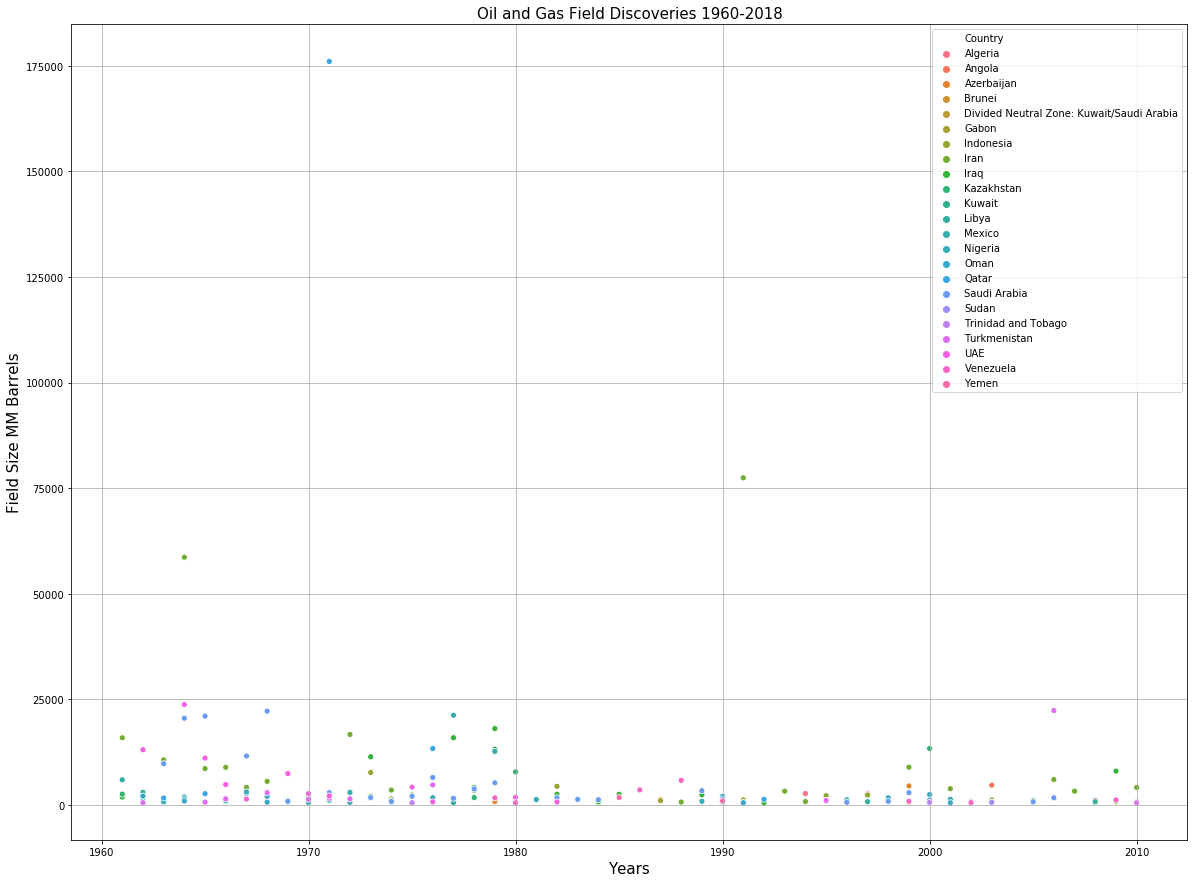

In [116]:
plt.figure(figsize=(20,15))
g =sns.scatterplot(x="Year", y="Field_Size_MM_Barrels",
              hue="Country",
              data=Discoveries_Oil_Countries);
                  
plt.title('Oil and Gas Field Discoveries 1960-2018',fontsize =15)
plt.xlabel('Years',fontsize =15)
plt.ylabel('Field Size MM Barrels',fontsize =15)
plt.grid(True)

In [120]:
Discoveries_Oil_Countries

,Country,Year,Field_Size_MM_Barrels
0,Algeria,1961,2462
1,Algeria,1962,2413
2,Algeria,1965,500
3,Algeria,1994,2679
4,Algeria,1995,908
...,...,...,...
209,Venezuela,1999,843
210,Venezuela,2002,530
211,Venezuela,2009,1166
212,Yemen,1985,1733


In [122]:
GDP_growth_oil_producing_countries = df4

In [123]:
GDP_growth_oil_producing_countries

,Country,Year,GDP Annual Growth
0,Arab World,1961,NaN
1,Arab World,1962,NaN
2,Arab World,1963,NaN
3,Arab World,1964,NaN
4,Arab World,1965,NaN
...,...,...,...
15307,Zimbabwe,2014,2.376929
15308,Zimbabwe,2015,1.779873
15309,Zimbabwe,2016,0.755869
15310,Zimbabwe,2017,4.704035


In [124]:
GDP_growth_oil_producing_countries= GDP_growth_oil_producing_countries[GDP_growth_oil_producing_countries['Country'].isin(['Algeria', 'Angola', 'Antigua and Barbuda', 'Azerbaijan',
       'Brunei Darussalam',
       'Gabon', 'Indonesia', 
       'Iran, Islamic Rep.', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Libya', 'Mexico', 'Nigeria', 'Oman', 'Qatar',
       'Saudi Arabia', 'Sudan',
       'Trinidad and Tobago', 'Turkmenistan',
       'United Arab Emirates', 'Venezuela, RB',
       'Yemen, Rep.'])]
GDP_growth_oil_producing_countries

,Country,Year,GDP Annual Growth
2842,Algeria,1961,-13.605441
2843,Algeria,1962,-19.685042
2844,Algeria,1963,34.313729
2845,Algeria,1964,5.839413
2846,Algeria,1965,6.206898
...,...,...,...
15191,"Yemen, Rep.",2014,-0.188690
15192,"Yemen, Rep.",2015,-16.678463
15193,"Yemen, Rep.",2016,-13.621458
15194,"Yemen, Rep.",2017,-5.942320


In [125]:
GDP_growth_oil_producing_countries['Country'].replace(['Brunei Darussalam','Iran, Islamic Rep.','United Arab Emirates','Venezuela, RB','Yemen, Rep.'],['Brunei','Iran','UAE','Venezuela','Yemen'],inplace=True)                           

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [126]:
GDP_growth_oil_producing_countries

,Country,Year,GDP Annual Growth
2842,Algeria,1961,-13.605441
2843,Algeria,1962,-19.685042
2844,Algeria,1963,34.313729
2845,Algeria,1964,5.839413
2846,Algeria,1965,6.206898
...,...,...,...
15191,Yemen,2014,-0.188690
15192,Yemen,2015,-16.678463
15193,Yemen,2016,-13.621458
15194,Yemen,2017,-5.942320


In [127]:
Discoveries_Oil_Countries

,Country,Year,Field_Size_MM_Barrels
0,Algeria,1961,2462
1,Algeria,1962,2413
2,Algeria,1965,500
3,Algeria,1994,2679
4,Algeria,1995,908
...,...,...,...
209,Venezuela,1999,843
210,Venezuela,2002,530
211,Venezuela,2009,1166
212,Yemen,1985,1733


In [128]:
Discoveries_Oil_Countries.dtypes

Country                  object
Year                      int64
Field_Size_MM_Barrels     int64
dtype: object

In [129]:
GDP_growth_oil_producing_countries.dtypes

Country               object
Year                  object
GDP Annual Growth    float64
dtype: object

In [130]:
GDP_growth_oil_producing_countries[["Year"]] = GDP_growth_oil_producing_countries[["Year"]].astype("int")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [131]:
GDP_growth_oil_producing_countries.dtypes

Country               object
Year                   int64
GDP Annual Growth    float64
dtype: object

In [132]:
result = pd.merge(GDP_growth_oil_producing_countries, Discoveries_Oil_Countries, on=['Country', 'Year'], how ='outer')

In [133]:
result

,Country,Year,GDP Annual Growth,Field_Size_MM_Barrels
0,Algeria,1961,-13.605441,2462.0
1,Algeria,1962,-19.685042,2413.0
2,Algeria,1963,34.313729,NaN
3,Algeria,1964,5.839413,NaN
4,Algeria,1965,6.206898,500.0
...,...,...,...,...
1331,Yemen,2016,-13.621458,NaN
1332,Yemen,2017,-5.942320,NaN
1333,Yemen,2018,-2.701475,NaN
1334,Divided Neutral Zone: Kuwait/Saudi Arabia,1963,NaN,832.0


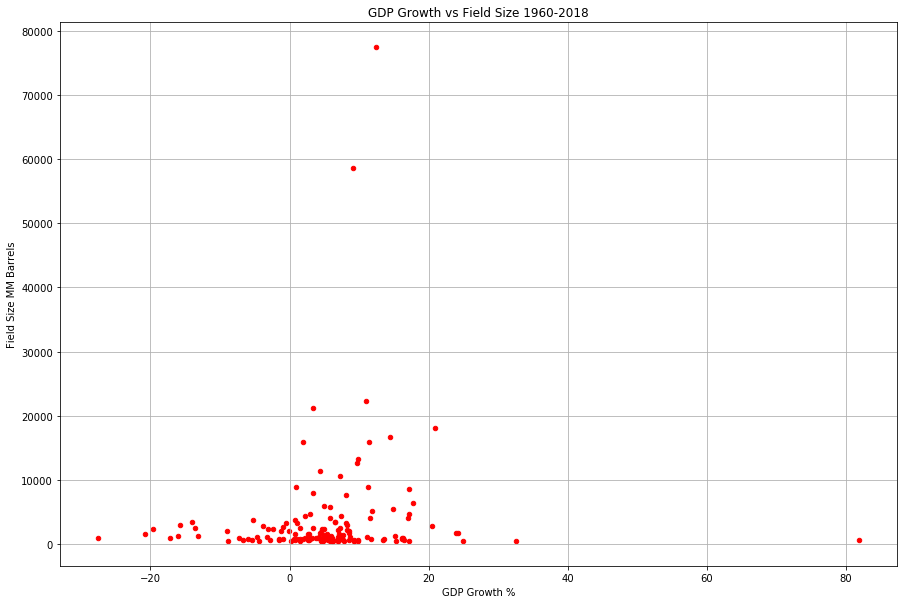

In [134]:
ax2= result.plot(kind='scatter', x='GDP Annual Growth', y='Field_Size_MM_Barrels', figsize=(15, 10), color='red')

plt.title('GDP Growth vs Field Size 1960-2018')
plt.xlabel('GDP Growth %')
plt.ylabel('Field Size MM Barrels')
plt.grid(True)
plt.show()

(0, 81589.82776783631)

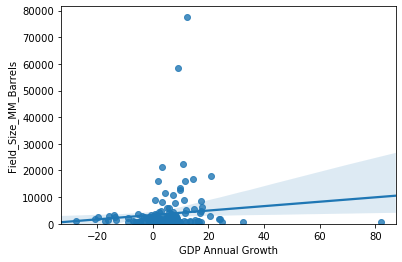

In [135]:
sns.regplot(x="GDP Annual Growth", y="Field_Size_MM_Barrels", data=result)
plt.ylim(0,)

In [136]:
result[['GDP Annual Growth', 'Field_Size_MM_Barrels']].corr()

,GDP Annual Growth,Field_Size_MM_Barrels
GDP Annual Growth,1.000000,0.104651
Field_Size_MM_Barrels,0.104651,1.000000


Notice some super giant fields that we can consider outliers as these occur only in extremely rare occasions.   
Let's consider field sizes of less than 30000 MM Barrels. Similarly GDP annual growth smaller than -30% and +30% are considered unusual. 

In [137]:
result_reduced = result[(result['GDP Annual Growth'] >= -30) & (result['GDP Annual Growth'] <= 30) & (result['Field_Size_MM_Barrels'] <= 30000)] 

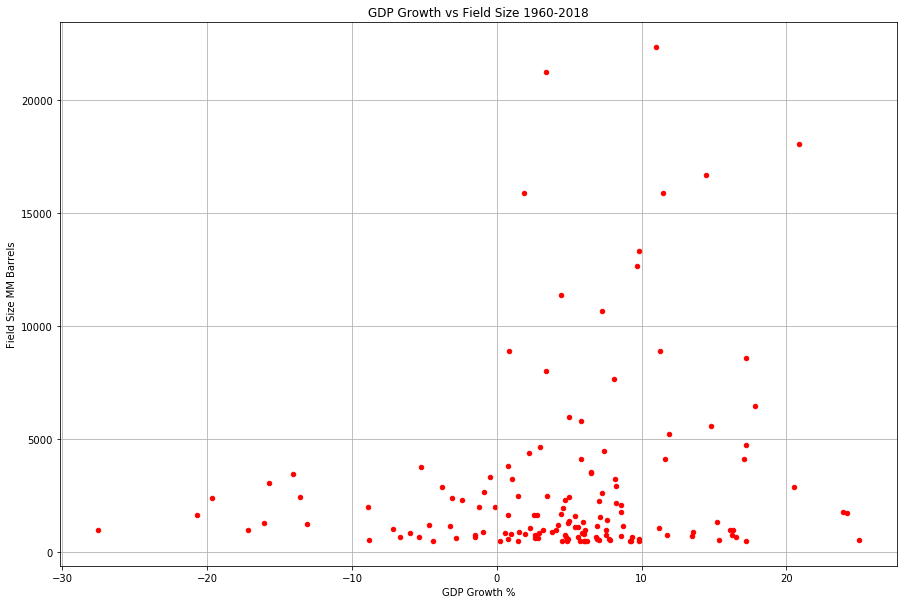

In [138]:
ax2= result_reduced.plot(kind='scatter', x='GDP Annual Growth', y='Field_Size_MM_Barrels', figsize=(15, 10), color='red')

plt.title('GDP Growth vs Field Size 1960-2018')
plt.xlabel('GDP Growth %')
plt.ylabel('Field Size MM Barrels')
plt.grid(True)
plt.show()

(0, 23584.196203279575)

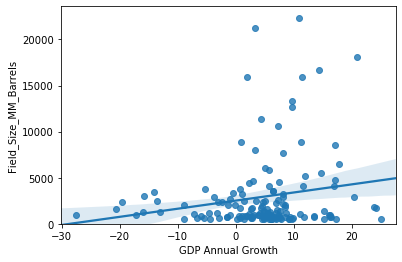

In [139]:
sns.regplot(x="GDP Annual Growth", y="Field_Size_MM_Barrels", data=result_reduced)
plt.ylim(0,)

In [140]:
result_reduced[['GDP Annual Growth', 'Field_Size_MM_Barrels']].corr()

,GDP Annual Growth,Field_Size_MM_Barrels
GDP Annual Growth,1.000000,0.186826
Field_Size_MM_Barrels,0.186826,1.000000


We obtain a better correlation for GDP annual growth and field size than in the previous case. However, that still does not represent a strong relationship. 

There is poor correlation between GDP annual growth and field size of a discovery in the same year when a discovery occurs. But perhaps the effect on GDP does not appear until a few years following a discovery, once it is exploitation and exportation start. Let's look at the GDP growth in the years following discoveries. We'll take the cases of three countries, Algeria, Venezuela and Iran.

### Algeria

In [316]:
result_Algeria = result[result['Country'] == 'Algeria']

In [317]:
result_Algeria.head() 

,Country,Year,GDP Annual Growth,Field_Size_MM_Barrels
0,Algeria,1961,-13.605441,2462.0
1,Algeria,1962,-19.685042,2413.0
2,Algeria,1963,34.313729,NaN
3,Algeria,1964,5.839413,NaN
4,Algeria,1965,6.206898,500.0


In [318]:
result_Algeria['Field_Size_MM_Barrels'] = result_Algeria['Field_Size_MM_Barrels'].div(1000)
result_Algeria.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Year,GDP Annual Growth,Field_Size_MM_Barrels
0,Algeria,1961,-13.605441,2.462
1,Algeria,1962,-19.685042,2.413
2,Algeria,1963,34.313729,NaN
3,Algeria,1964,5.839413,NaN
4,Algeria,1965,6.206898,0.500


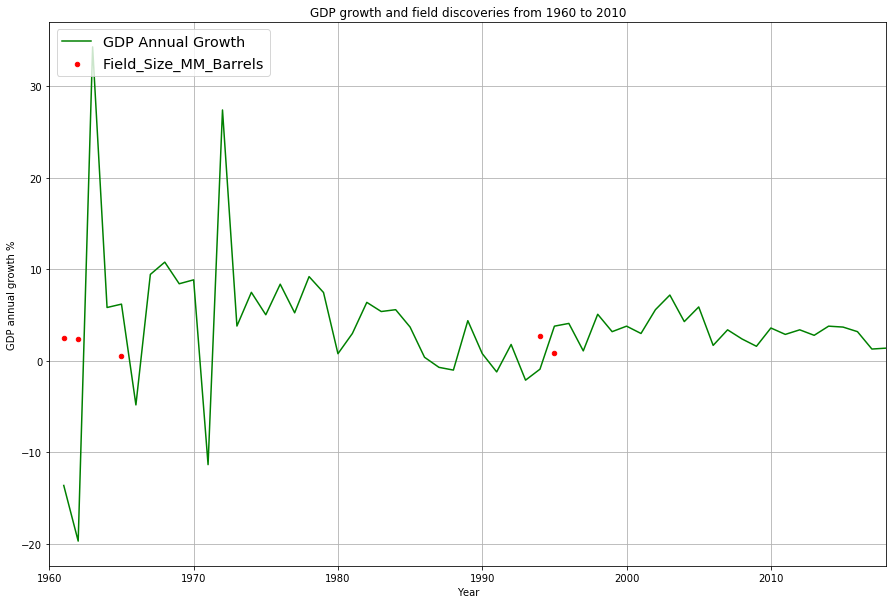

In [438]:
ax0 = result_Algeria.plot(kind='line',
                    x='Year',
                    y='GDP Annual Growth',
                    figsize=(15, 10),
                    color='green', 
                    xlim=(1960, 2018)
                   )

ax1 = result_Algeria.plot(kind='scatter',
                    x='Year',
                    y='Field_Size_MM_Barrels',
                    color="red",
                    ax = ax0
                   )

ax0.set_ylabel('GDP annual growth %')
ax0.set_title('GDP growth and field discoveries from 1960 to 2010')
ax0.legend(['GDP Annual Growth', 'Field_Size_MM_Barrels'], loc='upper left', fontsize='x-large')
plt.grid(True)

### Venezuela

In [141]:
result_Venezuela = result[result['Country'] == 'Venezuela']
result_Venezuela['Field_Size_MM_Barrels'] = result_Venezuela['Field_Size_MM_Barrels'].div(1000)
result_Venezuela.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Year,GDP Annual Growth,Field_Size_MM_Barrels
1218,Venezuela,1961,3.192519,NaN
1219,Venezuela,1962,8.532934,NaN
1220,Venezuela,1963,3.900951,NaN
1221,Venezuela,1964,11.129345,NaN
1222,Venezuela,1965,4.162867,NaN


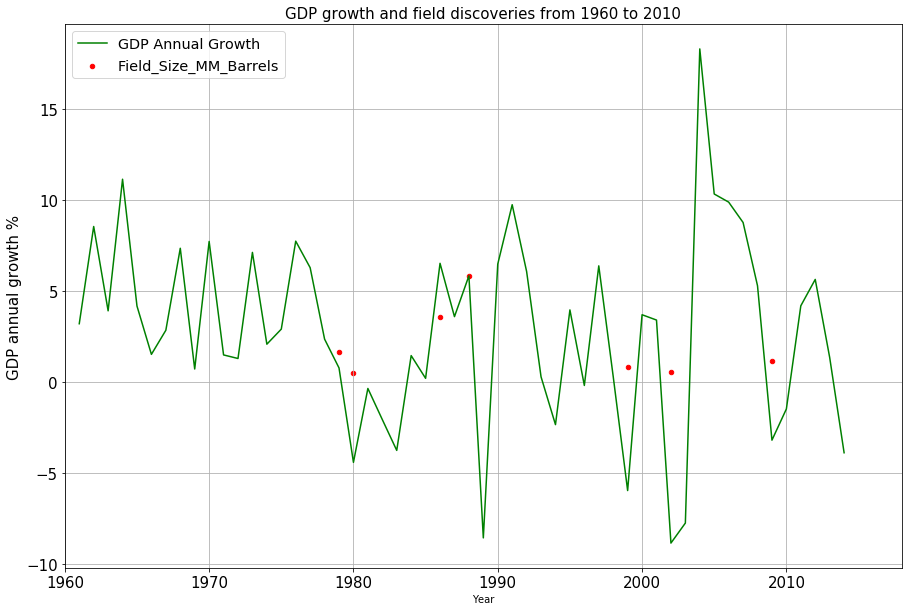

In [146]:
ax0 = result_Venezuela.plot(kind='line',
                    x='Year',
                    y='GDP Annual Growth',
                    figsize=(15, 10),
                    color='green', 
                    xlim=(1960, 2018),fontsize=15
                   )

ax1 = result_Venezuela.plot(kind='scatter',
                    x='Year',
                    y='Field_Size_MM_Barrels',
                    color="red",
                    ax = ax0, fontsize=15
                   )

ax0.set_ylabel('GDP annual growth %',fontsize=15)
ax0.set_title('GDP growth and field discoveries from 1960 to 2010',fontsize=15)
ax0.legend(['GDP Annual Growth', 'Field_Size_MM_Barrels'], loc='upper left', fontsize='x-large')
plt.grid(True)

### Iran

In [322]:
result_Iran = result[result['Country'] == 'Iran']
result_Iran['Field_Size_MM_Barrels'] = result_Iran['Field_Size_MM_Barrels'].div(1000)
result_Iran.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Year,GDP Annual Growth,Field_Size_MM_Barrels
406,Iran,1961,11.477601,15.880
407,Iran,1962,8.590433,1.785
408,Iran,1963,7.274456,10.645
409,Iran,1964,9.193939,58.646
410,Iran,1965,17.217673,8.585


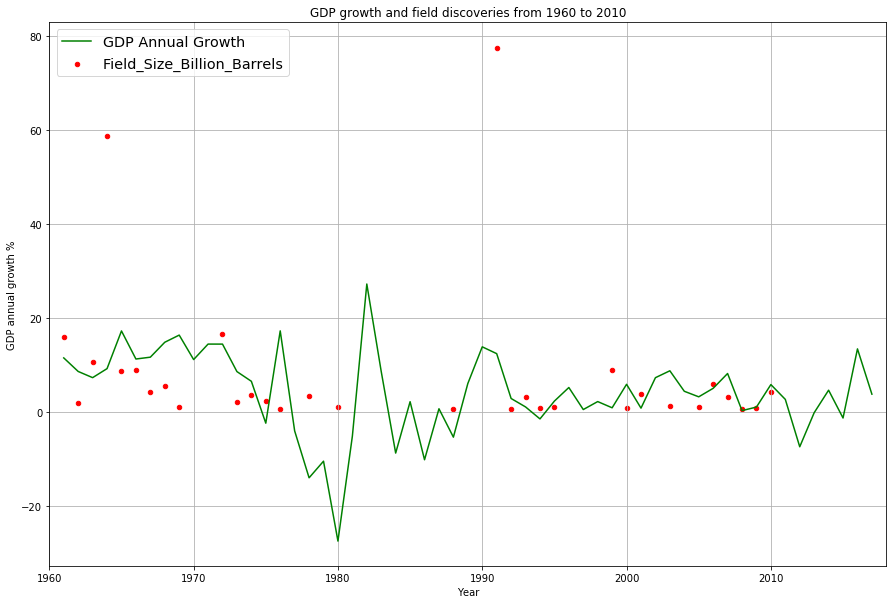

In [440]:
ax0 = result_Iran.plot(kind='line',
                    x='Year',
                    y='GDP Annual Growth',
                    figsize=(15, 10),
                    color='green', 
                    xlim=(1960, 2018)
                   )

ax1 = result_Iran.plot(kind='scatter',
                    x='Year',
                    y='Field_Size_MM_Barrels',
                    color="red",
                    ax = ax0
                   )

ax0.set_ylabel('GDP annual growth %')
ax0.set_title('GDP growth and field discoveries from 1960 to 2010')
ax0.legend(['GDP Annual Growth', 'Field_Size_Billion_Barrels'], loc='upper left', fontsize='x-large')
plt.grid(True)

From these examples, it is clear to see that the impact of a discovery on the GDP growth takes several years to occur from the discovery date. In the next steps of code we'll try to assign the maximum GDP growth value that occurs in the five years following a discovery. We then shift that value to be assigned to the year of discovery. That way we are able to plot the maximum GDP growth value and its associated discovery on the same graph.

In [148]:
result

,Country,Year,GDP Annual Growth,Field_Size_MM_Barrels
0,Algeria,1961,-13.605441,2462.0
1,Algeria,1962,-19.685042,2413.0
2,Algeria,1963,34.313729,NaN
3,Algeria,1964,5.839413,NaN
4,Algeria,1965,6.206898,500.0
...,...,...,...,...
1331,Yemen,2016,-13.621458,NaN
1332,Yemen,2017,-5.942320,NaN
1333,Yemen,2018,-2.701475,NaN
1334,Divided Neutral Zone: Kuwait/Saudi Arabia,1963,NaN,832.0


In [149]:
result['Field_Size_MM_Barrels'] = result['Field_Size_MM_Barrels'].div(1000)
result['GDP_5years_Max_Growth'] = result.iloc[:,2].rolling(window=5).max().shift(periods=-4)
result= result.rename(columns={"Field_Size_MM_Barrels":'Field_Size_B_Barrels'})

In [150]:
result= result.set_index('Country')
result

,Year,GDP Annual Growth,Field_Size_B_Barrels,GDP_5years_Max_Growth
Country,,,,
Algeria,1961,-13.605441,2.462,34.313729
Algeria,1962,-19.685042,2.413,34.313729
Algeria,1963,34.313729,NaN,34.313729
Algeria,1964,5.839413,NaN,10.796239
Algeria,1965,6.206898,0.500,10.796239
...,...,...,...,...
Yemen,2016,-13.621458,NaN,NaN
Yemen,2017,-5.942320,NaN,NaN
Yemen,2018,-2.701475,NaN,NaN


In [151]:
result =result.drop ('Divided Neutral Zone: Kuwait/Saudi Arabia')
result= result.reset_index()

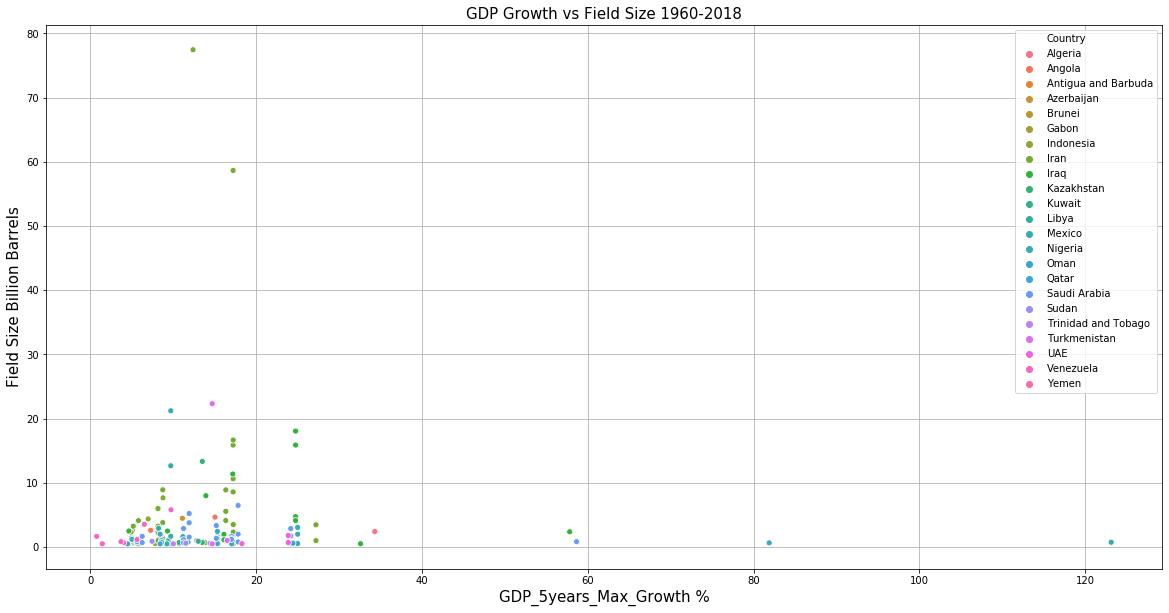

In [152]:
plt.figure(figsize=(20,10))
g =sns.scatterplot(x="GDP_5years_Max_Growth", y="Field_Size_B_Barrels",
              hue="Country",
              data=result);
                  
plt.title('GDP Growth vs Field Size 1960-2018',fontsize=15)
plt.xlabel('GDP_5years_Max_Growth %',fontsize=15)
plt.ylabel('Field Size Billion Barrels',fontsize=15)
plt.grid(True)

In [153]:
result.describe()

,Year,GDP Annual Growth,Field_Size_B_Barrels,GDP_5years_Max_Growth
count,1334.000000,1014.000000,212.000000,954.000000
mean,1989.500000,4.448590,4.670425,11.672086
std,16.746947,9.892653,14.198313,12.550813
min,1961.000000,-64.047107,0.500000,-5.300000
25%,1975.000000,0.920525,0.761000,5.740646
50%,1989.500000,4.139010,1.358000,8.220007
75%,2004.000000,7.274411,3.249250,13.533277
max,2018.000000,123.139555,176.060000,123.139555


We should also consider the population size of a country relative to its GDP growth. We use GDP growth per capita for that.

In [154]:
GDP_per_capita_growth_oil_producing_countries = df6
GDP_per_capita_growth_oil_producing_countries=GDP_per_capita_growth_oil_producing_countries[['Country','Year','GDP Per Capita Annual Growth']]
GDP_per_capita_growth_oil_producing_countries= GDP_per_capita_growth_oil_producing_countries[GDP_per_capita_growth_oil_producing_countries['Country'].isin(['Algeria', 'Angola', 'Antigua and Barbuda', 'Azerbaijan',
       'Brunei Darussalam',
       'Gabon', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Libya', 'Mexico', 'Nigeria', 'Oman', 'Qatar',
       'Saudi Arabia', 'Sudan',
       'Trinidad and Tobago', 'Turkmenistan',
       'United Arab Emirates', 'Venezuela, RB',
       'Yemen, Rep.'])]
GDP_per_capita_growth_oil_producing_countries['Country'].replace(['Brunei Darussalam','Iran, Islamic Rep.','United Arab Emirates','Venezuela, RB','Yemen, Rep.'],['Brunei','Iran','UAE','Venezuela','Yemen'],inplace=True) 
GDP_per_capita_growth_oil_producing_countries[["Year"]] = GDP_per_capita_growth_oil_producing_countries[["Year"]].astype("int")
result2= pd.merge(GDP_per_capita_growth_oil_producing_countries, Discoveries_Oil_Countries, on=['Country', 'Year'], how ='outer')
result2['Field_Size_MM_Barrels'] = result2['Field_Size_MM_Barrels'].div(1000)
result2['GDP_per_capita_Max_5 years_Growth'] = result2.iloc[:,2].rolling(window=5).max().shift(periods=-4)
result2= result2.rename(columns={"Field_Size_MM_Barrels":'Field_Size_B_Barrels'})

In [155]:
result2

,Country,Year,GDP Per Capita Annual Growth,Field_Size_B_Barrels,GDP_per_capita_Max_5 years_Growth
0,Algeria,1961,-15.727715,2.462,31.010513
1,Algeria,1962,-21.644486,2.413,31.010513
2,Algeria,1963,31.010513,NaN,31.010513
3,Algeria,1964,3.164589,NaN,7.645480
4,Algeria,1965,3.421089,0.500,7.645480
...,...,...,...,...,...
1331,Yemen,2016,-15.752675,NaN,NaN
1332,Yemen,2017,-8.194890,NaN,NaN
1333,Yemen,2018,-4.968007,NaN,NaN
1334,Divided Neutral Zone: Kuwait/Saudi Arabia,1963,NaN,0.832,NaN


In [156]:
result2= result2.set_index('Country')
result2 =result2.drop ('Divided Neutral Zone: Kuwait/Saudi Arabia')
result2= result2.reset_index()
result2

,Country,Year,GDP Per Capita Annual Growth,Field_Size_B_Barrels,GDP_per_capita_Max_5 years_Growth
0,Algeria,1961,-15.727715,2.462,31.010513
1,Algeria,1962,-21.644486,2.413,31.010513
2,Algeria,1963,31.010513,NaN,31.010513
3,Algeria,1964,3.164589,NaN,7.645480
4,Algeria,1965,3.421089,0.500,7.645480
...,...,...,...,...,...
1329,Yemen,2014,-2.802976,NaN,-2.802976
1330,Yemen,2015,-18.799099,NaN,NaN
1331,Yemen,2016,-15.752675,NaN,NaN
1332,Yemen,2017,-8.194890,NaN,NaN


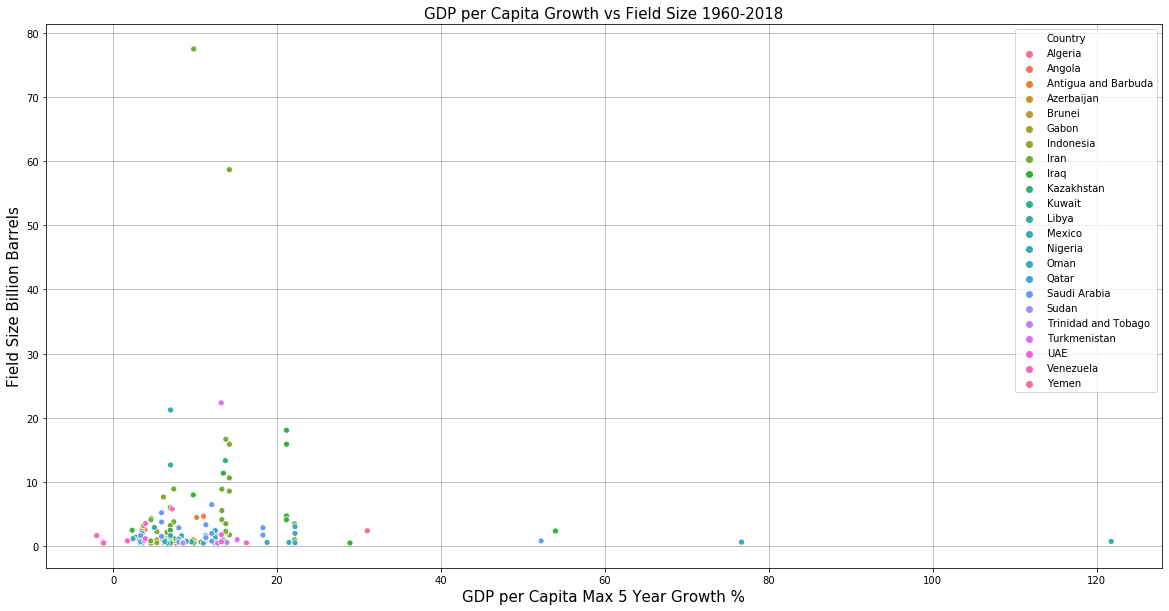

In [157]:
plt.figure(figsize=(20,10))
g =sns.scatterplot(x="GDP_per_capita_Max_5 years_Growth", y="Field_Size_B_Barrels",
              hue="Country",
              data=result2);
plt.title('GDP per Capita Growth vs Field Size 1960-2018', fontsize=15 )
plt.xlabel('GDP per Capita Max 5 Year Growth %', fontsize=15)
plt.ylabel('Field Size Billion Barrels', fontsize=15)
plt.grid(True)

In [334]:
result2.describe()

,Year,GDP Per Capita Annual Growth,Field_Size_B_Barrels,GDP_per_capita_Max_5 years_Growth
count,1334.000000,1011.000000,212.000000,951.000000
mean,1989.500000,1.704853,4.670425,8.805936
std,16.746947,9.626945,14.198313,12.288241
min,1961.000000,-64.992373,0.500000,-7.011835
25%,1975.000000,-1.790865,0.761000,3.233565
50%,1989.500000,1.683115,1.358000,5.579122
75%,2004.000000,4.711604,3.249250,11.004097
max,2018.000000,121.779543,176.060000,121.779543


Which countries saw a GDP per capita growth over 40%

In [335]:
GDP_per_capita_growth_oil_producing_countries[GDP_per_capita_growth_oil_producing_countries['GDP Per Capita Annual Growth'] > 40]

,Country,Year,GDP Per Capita Annual Growth
8091,Iraq,1990,53.974878
8105,Iraq,2004,50.236499
9331,Libya,2012,121.779543
11316,Oman,1967,61.658165
11317,Oman,1968,76.673873
12363,Saudi Arabia,1970,52.219090


## V) Discussion and Conclusion

The analysis conducted on the dataset from the World Bank and field discoveries from the Harvard study showed some interesting results.

First, we did not find a correlation between discovery size and GDP growth. Some of the largest fields discovered in the last 50 years resulted in 10-15% maximum GDP growth, whereas significantly smaller discoveries had similar GDP growth or more over the 5-year period following their discovery. Second, most of the highest GDP growth values observed for the same period are between 0-20%. Fewer countries experienced growth between 20-30% following a discovery and only a handful saw growth between 30-40%. Finally, only 4 countries recorded more than 40% GDP growth in one or two years. Those represented a recovery from major geopolitical event or crisis, civil war or military invasion, for example the two Iraq military invasions (1990 and 2003) or the fall of Gaddafi in Libya (2011).  

Based on these results it is difficult to imagine that the GDP growth of Guyana after brining the Stabroek discovery would be 86% in 2020, as this level of growth was historically relative to a recovery from major crisis. The IHS market prediction of GDP growth at 30% seems more plausible, although our analysis would suggest a rate between 15 and 25% to be more in line with historical records of GDP growth observed in 24 oil income dependent countries over the last 50 years. This analysis did not consider economic or political factors, nor any local conditions or context specific to Guyana that could still influence the estimation of the country's economic growth.
